# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 508 kB 11.2 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 7.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 147 kB 24.7 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 54 kB 4.2 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [1]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [3]:
client = MongoClient(mongod_connect)
db = client.gp12 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [4]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1327012025004941313
1327012025038467076
1327012025122381824
1327012025139163136
1327012025340399616
1327012025336287234
1327012025566957570
1327012025185218561
1327012025529229314
1327012025638203392
1327012025688461312
1327012025692778501
1327012025701179392
1327012025764114432
1327012025877241856
1327012025764032512
1327012025780875264
1327012026212782080
1327012026267230209
1327012026166566913
1327012026409947136
1327012026489597953
1327012026359549954
1327012026439307265
1327012026577727489
1327012026565029889
1327012026632318979
1327012026917371904
1327012026950905858
1327012027097878529
1327012026997202951
1327012027131437057
1327012027097899008
1327012027206950913
1327012027475189760
1327012027466997760
1327012027424976896
1327012027550879744
1327012027538214915
1327012027550879746
1327012027588636673
1327012027622187012
1327012027697655811
1327012027697680385
1327012027773165576
1327012027852845063
1327012027869618177
1327012027802509315
1327012027936636940
1327012027919896576


1327012058186084365
1327012058399973382
1327012058441846784
1327012058584453130
1327012058592911360
1327012058634854407
1327012058693513217
1327012058496462860
1327012058819424257
1327012059003817984
1327012059050102784
1327012059083640832
1327012059024920576
1327012059146452992
1327012059092037642
1327012059293290501
1327012060862029829
1327012060874428416
1327012060899622912
1327012060882878464
1327012060903989249
1327012060887179272
1327012061130481665
1327012061096923137
1327012060979408902
1327012061239529473
1327012061214281731
1327012061319221248
1327012061323403270
1327012061256114176
1327012061231116288
1327012061419888640
1327012061528924160
1327012061105315840
1327012061625413635
1327012061755314176
1327012061734445062
1327012061768003587
1327012061902106624
1327012061914730496
1327012061860290574
1327012062057283584
1327012062153805824
1327012062200016897
1327012062166470662
1327012062304858115
1327012062434897923
1327012062573207552
1327012062447497216
1327012062615252993


1327012094483501064
1327012094479314952
1327012094546472960
1327012094496149506
1327012094613417984
1327012094575833088
1327012094634561536
1327012094676512771
1327012094605221888
1327012094907183104
1327012094928056320
1327012095016177664
1327012095209009152
1327012095158874114
1327012095225856000
1327012095418920962
1327012095418744833
1327012095590764544
1327012095616016385
1327012095783817220
1327012095775346688
1327012095892733952
1327012095980761090
1327012095976566784
1327012096220016643
1327012096169701376
1327012096387772416
1327012096429731841
1327012096404561928
1327012096345837568
1327012096391991297
1327012096446488578
1327012096568135681
1327012096589049856
1327012096429666308
1327012096563949570
1327012096626860032
1327012096656044037
1327012096899420162
1327012096861757444
1327012096840781827
1327012096937226241
1327012097079783424
1327012097067192320
1327012096878514184
1327012097084043266
1327012097000148993
1327012097075634176
1327012097234857985
1327012097453002752


1327012129182986240
1327012129266753536
1327012129275224064
1327012129145229314
1327012129552146434
1327012129606537216
1327012129455665160
1327012129703071745
1327012129644359680
1327012129698942976
1327012129812180999
1327012129929564168
1327012129967312896
1327012129988251648
1327012129929633799
1327012129963175937
1327012129988354048
1327012130135048192
1327012130076450817
1327012130160144384
1327012130311303168
1327012130323898370
1327012130231607299
1327012130386796546
1327012130386743297
1327012130638286848
1327012130755911683
1327012130793562114
1327012130701369351
1327012130978193415
1327012130961297408
1327012131200528384
1327012131250778122
1327012131288518657
1327012131414417408
1327012132303486978
1327012132253167616
1327012132395778048
1327012132219625473
1327012132312002561
1327012132370706433
1327012132454604801
1327012132647526405
1327012132718665728
1327012132681101313
1327012132748201986
1327012132794159104
1327012132748226565
1327012132978913280
1327012132961992704


1327012163211325441
1327012163173511168
1327012163165310976
1327012163286757376
1327012163299414016
1327012163353886720
1327012163416834048
1327012163454717954
1327012163379212289
1327012163471327233
1327012163404369928
1327012163542663168
1327012163597316096
1327012163786039297
1327012163723030528
1327012163811045376
1327012163794374658
1327012163983007746
1327012163806957571
1327012163970625536
1327012163995758596
1327012164121616384
1327012165811802112
1327012165874806788
1327012165933535234
1327012166038327296
1327012166021607429
1327012166021619712
1327012166235529217
1327012166197764098
1327012166143184897
1327012166159962114
1327012166390657025
1327012166298382337
1327012166378065926
1327012166516543490
1327012166474469376
1327012166520758275
1327012166529060867
1327012166818553861
1327012166814326789
1327012166872961024
1327012166793388032
1327012167044874241
1327012167091105795
1327012167036538880
1327012167133122561
1327012167246258177
1327012167263010816
1327012167229566980


1327012199290839040
1327012199324323847
1327012199467016193
1327012199383101451
1327012199542321153
1327012199458631680
1327012199563489285
1327012199508955138
1327012199982911490
1327012199873785857
1327012200083464193
1327012199940894720
1327012200125325312
1327012200188407808
1327012200217657344
1327012200305754112
1327012200423178242
1327012200452599809
1327012200591011847
1327012200641400833
1327012200771448835
1327012200796471296
1327012200762970114
1327012200825937927
1327012200951721984
1327012200972619777
1327012200985337858
1327012200968560646
1327012201106972674
1327012201215963136
1327012201283063815
1327012201257811968
1327012201270480896
1327012201379540999
1327012201262055424
1327012201513816065
1327012201518010368
1327012201555783683
1327012201706741764
1327012201677328384
1327012201727733761
1327012201836765185
1327012201677398016
1327012201849360386
1327012201798971393
1327012201920598017
1327012202063257600
1327012201996042240
1327012202239430657
1327012202201686017


1327012233738661888
1327012233805631488
1327012233935806466
1327012233919012866
1327012234048974850
1327012233998635010
1327012234032197632
1327012234124357632
1327012234049032199
1327012234132926466
1327012234237595649
1327012234149695489
1327012234250358785
1327012234329944065
1327012234460098562
1327012234610950144
1327012234686435329
1327012234623660033
1327012234673983490
1327012234724134912
1327012234380398592
1327012234820808710
1327012234858557440
1327012234967482369
1327012234892075008
1327012234967527424
1327012235059879937
1327012234996932608
1327012235122708481
1327012235307311106
1327012235508547585
1327012235475103752
1327012235403812864
1327012235521257474
1327012235646955520
1327012235487612929
1327012237190569984
1327012237245026308
1327012237333069824
1327012237345652736
1327012237307994118
1327012237576384518
1327012237509320708
1327012237618388993
1327012237484183555
1327012237681127426
1327012237681315843
1327012237777760261
1327012237857460224
1327012237819719681


1327012268215726082
1327012268001865728
1327012268115185665
1327012268308099074
1327012268207460352
1327012268387790848
1327012268396191751
1327012268509331456
1327012267951583236
1327012270736633858
1327012270832902144
1327012270820401153
1327012270866526208
1327012270703058947
1327012270887497728
1327012270925344774
1327012271223148545
1327012271160250368
1327012271306903553
1327012271395119104
1327012271290261505
1327012271403438080
1327012271420305409
1327012271621513216
1327012271667765248
1327012271592251392
1327012271718096902
1327012271680352256
1327012271701315589
1327012271751499776
1327012271839580162
1327012271831343106
1327012271986528256
1327012272162664448
1327012272150097920
1327012272221327360
1327012272368209928
1327012272380796929
1327012272259084290
1327012272397459456
1327012272439513088
1327012272296833024
1327012272489725953
1327012272552751105
1327012272321990662
1327012272619859975
1327012272628088833
1327012272577912838
1327012272670175232
1327012272812793856


1327012305045884928
1327012304492310528
1327012304802734081
1327012305188503552
1327012305142333441
1327012304693637121
1327012305427701760
1327012305423527936
1327012305574522885
1327012305503137799
1327012305536692225
1327012305729708033
1327012305754845186
1327012305796788227
1327012305800994829
1327012305742274560
1327012306002145280
1327012305977159683
1327012306023292930
1327012305998127104
1327012306027302912
1327012306127994880
1327012306090422273
1327012306149122049
1327012306182520832
1327012306329366529
1327012306325172224
1327012306610360320
1327012306597806081
1327012306547568641
1327012306484686857
1327012306723729409
1327012306761506817
1327012306937516033
1327012306912329729
1327012306832797696
1327012306916700160
1327012308359385090
1327012308305010688
1327012308451782656
1327012308384616451
1327012308279848963
1327012308401401860
1327012308510412800
1327012308552396800
1327012308699160576
1327012308757999616
1327012308787326983
1327012308850241536
1327012308950921216


1327012339598680069
1327012339468496896
1327012339699347456
1327012339699183617
1327012339737128961
1327012339636461570
1327012339883921414
1327012339988611072
1327012340001361923
1327012339556683776
1327012340076785665
1327012340198502400
1327012340156534784
1327012340248817667
1327012340085239813
1327012340336717825
1327012342027210755
1327012341960110095
1327012342106910721
1327012342106877953
1327012342232731649
1327012342232715265
1327012342283067394
1327012342379532288
1327012342547156992
1327012342832500737
1327012342819737600
1327012342723465216
1327012342878642183
1327012342991872006
1327012343042207747
1327012343092572166
1327012343205621760
1327012343230976000
1327012343327363074
1327012343583215616
1327012343482634246
1327012343478366212
1327012343692353547
1327012343662854144
1327012343704858625
1327012343956574208
1327012343994343424
1327012344090734593
1327012344078077952
1327012344149454850
1327012344220807170
1327012344258498563
1327012344157917184
1327012344422162432


1327012373954060288
1327012375480897542
1327012375204081665
1327012375422177281
1327012375560671232
1327012375657005056
1327012375623462913
1327012375611006977
1327012375669714945
1327012375757611008
1327012376013664258
1327012375988490248
1327012376089137152
1327012375950622720
1327012376017776640
1327012376244346885
1327012376223363073
1327012376395325449
1327012376323952642
1327012376357572609
1327012376449744896
1327012376391024640
1327012376567296001
1327012376739155968
1327012376923820033
1327012377032683520
1327012377011785728
1327012377020297219
1327012377179660291
1327012377125154819
1327012377175359488
1327012377120940034
1327012377032855559
1327012377229836288
1327012377183850497
1327012377095761921
1327012377380986882
1327012377381003264
1327012377464889345
1327012377506828291
1327012377490022401
1327012377527808002
1327012377573855232
1327012377582329856
1327012377670332418
1327012377678680064
1327012377792040961
1327012377859141634
1327012377745887238
1327012377133412353


1327012409819750405
1327012409912029184
1327012409928601600
1327012410063015936
1327012410121543680
1327012410025259018
1327012410234970119
1327012410364891138
1327012410373320704
1327012410394365952
1327012410461466631
1327012410360729600
1327012410570518528
1327012410390147072
1327012410507538434
1327012410578907141
1327012410822103040
1327012410943684608
1327012410742468623
1327012410876637184
1327012411006722048
1327012411010928641
1327012411136561152
1327012411069648896
1327012411333754881
1327012411300319232
1327012411304513536
1327012411438579713
1327012411451195393
1327012411455500291
1327012411585552385
1327012411631673351
1327012411677741056
1327012413221330957
1327012413280018433
1327012413158404097
1327012413359738881
1327012413263122433
1327012413447811073
1327012413460377604
1327012413703536642
1327012413842059266
1327012413942722565
1327012413871427587
1327012413925978113
1327012414005637121
1327012413909200898
1327012414064357376
1327012414118772736
1327012414148132864


1327012444649250817
1327012444636635136
1327012444686979072
1327012444682776577
1327012444812636160
1327012445018329090
1327012445068685313
1327012445370642432
1327012445475516418
1327012444766691333
1327012446771367936
1327012446448603137
1327012446876426242
1327012446771548161
1327012446960295937
1327012447010615300
1327012447085989889
1327012447052587010
1327012447081951236
1327012447157432320
1327012447312547840
1327012447408902144
1327012447283273728
1327012447362949120
1327012447471824897
1327012447538929664
1327012447526547457
1327012447698477057
1327012447757234178
1327012447882866688
1327012448113725449
1327012448088559616
1327012448063381505
1327012448042446852
1327012448327536640
1327012448306688002
1327012448415543296
1327012448407261185
1327012448499449856
1327012448394637313
1327012448553996288
1327012448616923138
1327012448566579200
1327012448663187458
1327012448583512065
1327012448659005443
1327012448855986176
1327012448860209152
1327012448956600322
1327012448914837504


1327012480330190849
1327012480414003200
1327012480367742976
1327012480363663362
1327012480367927302
1327012480485380097
1327012480531505154
1327012480514748417
1327012480489562112
1327012480527241216
1327012480468611073
1327012480674004993
1327012480686583812
1327012480741224454
1327012480711843842
1327012480812453894
1327012480896393217
1327012480888004608
1327012480896233472
1327012480929841152
1327012480892219398
1327012481114357763
1327012480976113667
1327012480913117187
1327012481114406912
1327012481148071941
1327012481152245761
1327012481223385088
1327012481617813506
1327012481617825794
1327012481676480515
1327012481672343552
1327012481798205445
1327012481642926080
1327012481886269445
1327012481949069312
1327012481856843778
1327012481533956103
1327012482003693569
1327012482150490113
1327012482003705858
1327012482066636800
1327012482175660038
1327012482133549056
1327012482234290176
1327012482351820801
1327012482465083394
1327012482750312453
1327012482628653056
1327012482636865537


1327012515709145089
1327012515759448066
1327012515805466624
1327012515822391297
1327012515520393221
1327012515860144128
1327012515830583296
1327012515944026114
1327012516019523586
1327012515788754944
1327012515935625217
1327012515964997632
1327012516124389377
1327012516199886849
1327012516204072961
1327012516166242304
1327012515847364608
1327012516271153152
1327012516543782912
1327012516514439173
1327012516535422976
1327012516438958080
1327012516728279041
1327012516757696515
1327012516678029312
1327012516929658883
1327012516954828801
1327012516912881666
1327012517059543040
1327012517143486464
1327012517097447426
1327012517101506560
1327012518137655299
1327012518250876939
1327012518200549385
1327012518263394307
1327012518167011328
1327012518317809664
1327012518343032832
1327012518330417153
1327012518334664705
1327012518519336963
1327012518523326464
1327012518632456192
1327012518708043776
1327012518758322179
1327012518833885188
1327012518934548483
1327012519072968705
1327012519144288258


1327012548936404995
1327012549221642243
1327012549255172104
1327012549360033792
1327012549523611650
1327012549544583168
1327012549590650880
1327012549737345024
1327012549750034433
1327012549636870146
1327012549594845186
1327012549716545536
1327012549724876800
1327012549582336001
1327012550043701249
1327012549934669827
1327012550014357506
1327012549947256838
1327012550110810114
1327012550068871169
1327012550085492736
1327012550186242049
1327012551692087297
1327012551620694021
1327012551725608961
1327012551754981376
1327012551671115778
1327012552006459392
1327012552048582659
1327012552119873537
1327012552140861441
1327012552161849344
1327012552405114886
1327012552664989696
1327012552463814657
1327012552618823681
1327012552857907200
1327012553021657088
1327012552803373057
1327012552979714048
1327012553168457728
1327012552933425153
1327012553361276929
1327012553457799174
1327012553545879553
1327012553684357121
1327012553826988040
1327012553881505793
1327012554040864769
1327012553818562571


1327012583614910465
1327012583665111042
1327012583937695745
1327012584034275330
1327012584193605632
1327012584281808896
1327012584273416193
1327012584365707264
1327012585145835520
1327012585129041920
1327012585246429185
1327012585334595591
1327012585380614145
1327012585334509579
1327012585321926661
1327012585745465344
1327012585737228289
1327012585674256385
1327012585992949761
1327012585812725761
1327012585955336197
1327012586068586498
1327012586261516290
1327012586273918978
1327012586479468544
1327012586450165760
1327012586559135745
1327012586492190720
1327012586651406336
1327012586638946304
1327012586676752385
1327012586764836866
1327012586810978305
1327012586844393473
1327012586869682178
1327012586794127361
1327012587028971521
1327012587029061635
1327012586932498433
1327012587201064962
1327012587263979520
1327012587213557767
1327012587272364032
1327012587301601280
1327012587330891777
1327012587352059912
1327012587414831104
1327012587456892929
1327012587536404480
1327012587289137154


1327012619585277953
1327012619543261186
1327012619593531393
1327012619681673218
1327012619602030594
1327012619656581120
1327012619698450433
1327012619723681793
1327012619819966464
1327012619371294720
1327012619887276033
1327012620100984833
1327012620214415361
1327012620214398977
1327012620096991233
1327012620394782722
1327012620445114370
1327012619685748736
1327012620331782144
1327012620314918912
1327012620465999873
1327012620545777668
1327012620742795266
1327012620730327045
1327012620679979010
1327012620944220162
1327012621028118528
1327012621183283200
1327012621262970880
1327012621304942595
1327012621417992194
1327012621506240522
1327012621401382913
1327012622961676289
1327012623032971277
1327012623158702080
1327012623230132225
1327012623213355011
1327012623204937734
1327012623359983616
1327012623435657217
1327012623389487109
1327012623410454531
1327012623573987328
1327012623603347461
1327012623620079616
1327012623469207552
1327012623699881987
1327012623204966401
1327012623808913413


1327012653965963265
1327012654083354624
1327012654163046401
1327012654301540352
1327012654393610240
1327012654360178688
1327012654574133256
1327012654519640068
1327012654817419270
1327012654960021506
1327012654913875971
1327012655119347714
1327012655073267714
1327012655228354560
1327012655182147584
1327012655123505152
1327012655295569921
1327012655241060352
1327012655341719553
1327012655236849666
1327012655417069568
1327012656465768448
1327012656457293824
1327012656604205056
1327012656708947968
1327012656792834048
1327012656734203907
1327012656918695937
1327012656843255822
1327012657065562112
1327012657027801094
1327012657208037376
1327012657120022531
1327012657237528577
1327012657224970240
1327012657287868417
1327012657346568196
1327012657505972224
1327012657518551046
1327012657594052615
1327012657493385216
1327012657535324162
1327012657681993729
1327012657606496256
1327012657665368072
1327012657669476354
1327012657803661313
1327012657870774272
1327012657904427008
1327012657921216513


1327012688539447296
1327012688535441409
1327012688652865537
1327012688518668295
1327012688652800003
1327012690074742784
1327012690053664768
1327012689860849664
1327012690120896517
1327012690389241859
1327012690523549698
1327012690686926848
1327012690586447874
1327012690741616642
1327012690594762757
1327012690884083712
1327012690766802944
1327012690901037056
1327012690997309440
1327012691177734144
1327012691223977986
1327012691249156096
1327012691332960256
1327012691299475456
1327012691387432962
1327012691488239617
1327012691479814146
1327012691546951681
1327012691504979968
1327012691488215041
1327012691676807168
1327012691735621632
1327012691806806017
1327012691702005760
1327012691966365696
1327012692008251392
1327012692062736385
1327012692025020416
1327012692192849921
1327012691957846022
1327012692180267008
1327012692171886592
1327012692268253184
1327012692435955712
1327012692473704448
1327012692515753984
1327012692582797313
1327012692536692736
1327012692436119556
1327012692742213637


1327012724451274752
1327012724442882049
1327012724610568199
1327012724577079297
1327012724543545344
1327012724535070728
1327012724585410563
1327012724677611522
1327012724644130821
1327012724824551427
1327012724941926401
1327012724908453890
1327012725118169089
1327012725113937923
1327012725252263938
1327012725180887041
1327012725243998208
1327012725394984961
1327012725252382722
1327012725424353282
1327012725424152576
1327012725520785414
1327012725629718529
1327012725596286976
1327012725797642240
1327012725847953409
1327012725910695936
1327012725914968066
1327012725764059142
1327012725889904640
1327012725952798726
1327012725919076354
1327012726049103872
1327012727810912257
1327012728003674114
1327012728024739840
1327012728142118912
1327012728079347714
1327012728330850304
1327012728301629441
1327012728343556096
1327012728607674368
1327012728607805441
1327012728586854402
1327012728527933440
1327012728523907073
1327012728691519489
1327012728612007937
1327012728750415874
1327012728792289282


1327012758643150848
1327012758970195968
1327012759133949954
1327012759293267970
1327012759293227008
1327012759452737538
1327012759385595904
1327012759318396931
1327012759536537603
1327012759553200129
1327012759582638081
1327012759649865728
1327012759788253186
1327012759880527882
1327012759746306052
1327012759884738561
1327012760035618817
1327012760060891136
1327012759964315648
1327012761444999175
1327012761499545606
1327012761457614848
1327012761482694657
1327012761533026305
1327012761637953536
1327012761528918020
1327012761575022592
1327012761684078593
1327012761608609792
1327012761742700544
1327012761860239365
1327012761990287360
1327012762015256576
1327012762069905408
1327012762057371648
1327012762069987337
1327012762061578240
1327012762258731008
1327012762283859969
1327012762346786816
1327012762413887491
1327012762644586501
1327012762954977286
1327012762980151296
1327012763068055552
1327012763156279296
1327012763122741253
1327012763261132803
1327012763357437952
1327012763609165824


1327012795100098561
1327012794949046272
1327012795037134855
1327012795251126274
1327012795238526976
1327012795439788040
1327012795355959302
1327012795519471617
1327012795561299968
1327012795670532097
1327012795603357696
1327012795741728769
1327012795762814977
1327012795414614022
1327012795859263490
1327012795888529408
1327012795964157953
1327012795842514948
1327012795918012417
1327012796073205760
1327012796001710081
1327012796064739329
1327012796178030594
1327012796194820096
1327012796228382720
1327012796324745216
1327012796647829506
1327012796664602628
1327012796794548227
1327012796731715584
1327012796681293824
1327012796878397440
1327012796882685952
1327012796773576704
1327012797058834434
1327012796991737857
1327012797331501056
1327012797415256064
1327012797541179393
1327012797574647808
1327012797553766406
1327012797633470466
1327012797251678208
1327012797813829632
1327012797234827264
1327012797847203841
1327012797918613510
1327012797692190722
1327012797843169284
1327012797650063360


1327012829103345664
1327012829149474816
1327012829321437189
1327012829208211459
1327012829287882752
1327012829283512320
1327012829380141058
1327012829581361152
1327012829547925505
1327012829409533952
1327012829648437251
1327012829690474497
1327012829740879873
1327012829669552131
1327012829766045699
1327012829816184832
1327012829858291712
1327012829870895104
1327012829820489730
1327012829891850240
1327012829950427136
1327012830005047297
1327012830231420929
1327012830231588865
1327012830361624576
1327012830500040705
1327012830541844481
1327012830554566666
1327012830625759232
1327012830806151176
1327012831053672452
1327012831171063810
1327012831242432513
1327012832840458243
1327012832832057346
1327012832819351552
1327012832731410435
1327012832861450241
1327012832857133056
1327012832932753415
1327012833037484032
1327012832995667968
1327012833301827585
1327012833242935296
1327012833368817664
1327012833180213249
1327012833280864258
1327012833398284288
1327012833352183810
1327012833419276289


1327012863991554059
1327012864020918278
1327012864029323264
1327012864113119233
1327012864129785856
1327012863362404354
1327012864268382213
1327012864318709769
1327012864394108928
1327012864251584514
1327012864369045504
1327012864406802434
1327012864377430017
1327012864553586688
1327012866197573632
1327012866189381632
1327012866151620608
1327012866143133696
1327012866155835394
1327012866491224064
1327012866512314370
1327012866470404097
1327012866499764230
1327012866629783555
1327012866696863752
1327012866763988992
1327012866747224064
1327012866642370560
1327012866755620864
1327012866814316551
1327012866965319683
1327012866977894400
1327012867275698177
1327012867175018498
1327012867426684928
1327012867250515968
1327012867422384128
1327012867477020672
1327012867405729793
1327012867523158016
1327012867506204672
1327012867648851969
1327012867523153921
1327012867682418688
1327012867741138944
1327012867665580032
1327012867833413636
1327012867808301058
1327012868039041024
1327012868072550402


1327012899722825730
1327012899630575617
1327012899630542848
1327012899525713922
1327012900146331648
1327012900217741312
1327012900364374016
1327012900272304128
1327012900398043136
1327012900351959040
1327012900490371073
1327012900574289920
1327012900603654145
1327012900649771008
1327012900532350979
1327012900628819968
1327012900863500290
1327012900951748609
1327012901035634692
1327012900888858625
1327012901073399810
1327012901236903936
1327012901270343680
1327012901216018433
1327012901346021379
1327012901299904514
1327012901606092801
1327012901538893825
1327012901840830464
1327012901614481408
1327012901815799812
1327012901681471488
1327012901853523968
1327012901819994115
1327012901937422336
1327012901945815040
1327012901916438530
1327012901937299458
1327012901459255299
1327012902004396032
1327012901996163073
1327012902067466244
1327012902071570434
1327012902100996105
1327012902314913792
1327012902373494784
1327012902402985988
1327012902419771392
1327012902411317249
1327012902314840064


1327012934271299591
1327012934195826688
1327012934304870400
1327012934371852290
1327012934556540932
1327012934632017925
1327012934350893056
1327012934631960576
1327012934757847045
1327012934875279363
1327012934887694337
1327012934581694464
1327012935139352576
1327012934804000769
1327012935080689664
1327012935193878529
1327012935340875776
1327012935424622592
1327012935420567553
1327012935328288770
1327012935307309058
1327012935378501632
1327012935517020160
1327012935537975296
1327012935378604032
1327012935563087872
1327012935542181894
1327012935676424198
1327012935579922436
1327012935709847552
1327012935781191680
1327012935860953089
1327012935869206530
1327012937500930048
1327012937676951553
1327012937677103105
1327012937224040451
1327012937781932032
1327012937916149760
1327012937542885376
1327012938012651522
1327012937983160320
1327012938201387016
1327012938306097153
1327012938255777792
1327012938201305090
1327012938490765317
1327012938411110400
1327012938444644353
1327012938499186688


1327012968681201664
1327012968597483527
1327012968739946498
1327012968333266945
1327012968773472257
1327012968794443776
1327012968777854993
1327012968849031169
1327012969025335296
1327012969054605318
1327012968937254912
1327012969113391106
1327012969100800001
1327012969071345664
1327012969100750850
1327012969188831234
1327012969230839811
1327012969155231744
1327012971038404608
1327012970996568064
1327012971092996096
1327012971046952963
1327012971185381376
1327012971239923714
1327012971319476224
1327012971302825986
1327012971386527744
1327012971462205441
1327012971625603072
1327012971508273153
1327012971613196290
1327012971667546112
1327012971654987776
1327012971780956160
1327012971743223810
1327012971806142464
1327012972028440577
1327012972141506560
1327012972175224837
1327012972179369985
1327012972204535813
1327012972233887756
1327012972145860609
1327012972410122241
1327012972535836672
1327012972481433610
1327012972640817152
1327012972586295297
1327012972724580352
1327012972154261509


1327013004735508481
1327013004781686784
1327013004748021761
1327013004844601345
1327013004798529536
1327013004982980613
1327013004974682118
1327013005058519041
1327013005117284355
1327013005125677056
1327013005155053568
1327013005268197376
1327013005192814594
1327013005310255108
1327013005540945921
1327013005385674754
1327013005670887428
1327013005750571008
1327013005608054784
1327013005540769794
1327013005876473856
1327013005947785216
1327013006060912640
1327013006174261248
1327013006077800459
1327013006383910914
1327013006467854336
1327013006488768512
1327013006514016257
1327013006597820421
1327013006572744706
1327013006572724225
1327013006786629632
1327013006581108748
1327013006845292544
1327013006752894977
1327013006845370371
1327013006836789250
1327013006908284934
1327013006866325507
1327013007088611331
1327013007138844672
1327013007038193664
1327013007260520448
1327013007399014402
1327013007445139464
1327013007533158404
1327013007600328705
1327013007671455744
1327013007705006080


1327013038948560902
1327013039065980928
1327013039107936258
1327013039217008649
1327013039271415809
1327013039237980160
1327013039271530498
1327013039393083392
1327013039086833664
1327013039418249216
1327013039447678976
1327013039518965761
1327013039460245509
1327013039539974145
1327013039175053313
1327013039439294466
1327013039527366661
1327013039598661633
1327013039732789248
1327013039737016321
1327013039846027269
1327013039808393216
1327013039837626372
1327013040106123268
1327013040026492928
1327013040177311744
1327013040282361856
1327013040307388416
1327013040462696453
1327013040441716736
1327013042412929024
1327013042379497477
1327013042303983617
1327013042417143809
1327013042450784256
1327013042467467264
1327013042652139520
1327013042576523264
1327013042647928836
1327013042677190656
1327013042706673665
1327013042660515840
1327013042895335424
1327013042962325504
1327013042937352194
1327013042970787841
1327013042924773376
1327013042995957761
1327013042953994240
1327013042954104832


1327013073295716352
1327013073379581952
1327013073316687875
1327013073383776257
1327013073643855872
1327013073710948353
1327013073618575360
1327013073815789568
1327013074000351235
1327013074012938243
1327013074071502849
1327013074067365888
1327013074067394569
1327013074180714497
1327013074180608000
1327013075971522560
1327013075929755651
1327013075980005379
1327013076021874688
1327013076030382084
1327013076164460545
1327013076164612102
1327013076407885825
1327013076454043653
1327013076445622272
1327013076709875714
1327013076684648448
1327013076915380224
1327013076957163521
1327013076735062021
1327013077011869697
1327013077326368768
1327013077334646784
1327013077393543169
1327013077397762052
1327013077364117504
1327013077439614978
1327013077322248195
1327013077548724227
1327013077494231041
1327013077590667274
1327013077510987783
1327013077628366848
1327013077708050437
1327013077729091586
1327013078022512641
1327013078001717248
1327013077947060225
1327013077955596294
1327013078160928768


1327013108523560960
1327013108557230082
1327013108032925696
1327013108393467905
1327013108611641344
1327013109505138690
1327013109463207938
1327013109488377856
1327013109454827521
1327013109458984962
1327013109513510916
1327013109660258306
1327013109685370880
1327013109828083716
1327013109870059522
1327013109765201921
1327013109958107136
1327013109878362113
1327013110058606592
1327013110041993216
1327013109970636801
1327013110117445633
1327013110079623168
1327013110121684993
1327013110184599552
1327013110163574790
1327013110243348480
1327013110104928257
1327013110343815169
1327013110343938054
1327013110415314945
1327013110440357890
1327013110348193793
1327013110796996608
1327013110796914691
1327013110876565504
1327013110947803137
1327013111019098112
1327013111107346433
1327013111153496069
1327013111015088129
1327013111224733697
1327013111329656835
1327013111505833984
1327013111375613952
1327013111551889409
1327013111510028290
1327013111673577474
1327013111803633664
1327013111807811591


1327013143873130496
1327013143642517504
1327013143684538374
1327013143835537409
1327013144019996673
1327013144015802368
1327013144192049152
1327013144317800449
1327013143919341568
1327013144338829314
1327013144376586242
1327013144259125250
1327013144405766144
1327013144389054465
1327013144548548613
1327013144540160001
1327013144581926912
1327013144607256578
1327013144590479366
1327013144657604614
1327013144665993216
1327013144724705282
1327013144913436674
1327013144988848129
1327013144800223235
1327013145043464192
1327013145089429506
1327013145169121281
1327013145194475521
1327013145307701248
1327013145324507139
1327013145685217280
1327013145567629317
1327013145760686082
1327013145739743234
1327013145999597568
1327013145936863232
1327013147249496064
1327013147178315778
1327013147325173760
1327013146695962631
1327013147262246914
1327013147325198352
1327013147316719616
1327013147362930688
1327013147362922502
1327013147589296128
1327013147438428161
1327013147585163264
1327013147773980674


1327013178224599041
1327013178375610373
1327013178476097538
1327013178539208704
1327013178384015363
1327013178635546624
1327013178568486913
1327013178711138309
1327013178618875904
1327013178723737600
1327013178539184129
1327013178820206593
1327013178795028480
1327013178748841986
1327013178039943168
1327013179109634049
1327013179042525184
1327013179097042945
1327013179269009408
1327013179105431560
1327013178950160385
1327013179331731456
1327013178937634816
1327013179117821952
1327013179344498696
1327013180783144960
1327013180808245253
1327013180787318789
1327013181043077120
1327013180875313152
1327013180846071808
1327013180900564992
1327013180967706624
1327013181047271425
1327013181214998528
1327013181101785089
1327013181122891777
1327013181336788993
1327013181412102145
1327013181508571137
1327013181491802112
1327013181462433792
1327013181504491520
1327013181575708672
1327013181722681344
1327013181693325314
1327013181718401026
1327013181622022150
1327013181756219393
1327013181907116033


1327013213003722753
1327013212991188994
1327013213146390529
1327013213234470918
1327013213381255168
1327013213410570240
1327013213465178114
1327013213561614336
1327013214333267968
1327013214262013952
1327013214425550848
1327013214543093760
1327013214534524928
1327013214551494658
1327013214580830208
1327013214698299393
1327013214664749057
1327013214782107657
1327013214790557699
1327013214840905730
1327013214941536256
1327013214945767424
1327013214882709504
1327013214920585218
1327013214794772481
1327013215151255554
1327013215130316800
1327013215113539584
1327013215151161349
1327013215319023617
1327013215574786048
1327013215499415555
1327013215583178754
1327013215683768320
1327013215675572226
1327013215553904642
1327013215658778626
1327013215939661826
1327013215763656706
1327013215860109318
1327013215935533059
1327013216212439041
1327013216270991360
1327013216291962881
1327013216304705538
1327013216157839363
1327013216417964034
1327013216527015942
1327013216577331201
1327013216602484736


1327013248697315329
1327013248814567424
1327013248932212737
1327013249108176896
1327013249032720384
1327013249137709057
1327013249196417024
1327013249154355201
1327013249192239104
1327013249347330048
1327013249351442433
1327013249393561600
1327013249364209664
1327013249523593216
1327013249536176129
1327013249607462912
1327013249611685888
1327013249708032000
1327013249779441665
1327013249737482240
1327013250001637376
1327013249443717120
1327013250081435649
1327013250081431554
1327013250039508993
1327013249968189442
1327013250181959680
1327013252228927490
1327013252241510401
1327013252283437056
1327013252191178752
1327013252308627458
1327013252413394946
1327013252572786691
1327013252493152258
1327013252648284163
1327013252816019457
1327013252857962496
1327013252660744192
1327013252795162624
1327013252509933570
1327013253097119750
1327013253109706752
1327013253105524736
1327013253168422914
1327013253193592833
1327013253277478912
1327013253453647872
1327013253529145344
1327013253596270594


1327013283245670400
1327013283224760320
1327013283291951106
1327013283254120448
1327013283388329985
1327013283501649920
1327013283510054912
1327013283522510848
1327013283656822785
1327013283661041664
1327013283916865537
1327013285753917441
1327013285745491969
1327013285884030978
1327013285753974784
1327013285909172227
1327013286018211842
1327013286106238977
1327013286173261825
1327013286353772544
1327013286248931329
1327013286408310786
1327013286362091523
1327013286445944832
1327013286555029509
1327013286215360512
1327013286601166848
1327013286735269889
1327013286785716225
1327013286987042817
1327013286936797184
1327013287138103298
1327013287075057664
1327013286848544769
1327013287205236739
1327013287167488000
1327013287213494272
1327013287364423681
1327013287339364354
1327013287532371970
1327013287502909440
1327013287540781059
1327013287511396352
1327013287670685696
1327013287624634368
1327013287633035268
1327013287712747522
1327013287641423879
1327013287695839232
1327013287779774464


1327013319178211329
1327013319228723200
1327013319304224769
1327013319333486592
1327013319350378496
1327013319488774152
1327013319505367041
1327013319585263616
1327013319543312384
1327013319530647553
1327013319643959298
1327013319522312201
1327013319585239044
1327013319841107969
1327013319736168450
1327013319774003200
1327013319778181120
1327013319828512769
1327013319270535170
1327013320059211783
1327013320092749827
1327013320084230144
1327013320163921921
1327013320222760962
1327013320138878976
1327013320302313472
1327013320344408065
1327013320432357377
1327013320520572928
1327013320474451968
1327013320486916097
1327013320524787720
1327013320747065360
1327013320830889985
1327013320612745216
1327013321036492800
1327013320906379270
1327013321070014464
1327013321162289152
1327013321124536320
1327013321342521346
1327013321422241792
1327013321439137793
1327013321460027393
1327013321749319680
1327013321275547654
1327013321581735938
1327013321757794304
1327013321770405890
1327013321824985088


1327013353550721027
1327013353579900928
1327013354037256193
1327013354099990528
1327013354121138176
1327013354091794432
1327013354066599936
1327013354116947969
1327013353424900098
1327013354125275143
1327013353923940352
1327013354154717190
1327013354028851203
1327013354305703938
1327013354175680513
1327013354351648768
1327013354594914304
1327013354578325504
1327013354683109376
1327013354842562560
1327013354922184705
1327013354934767617
1327013354884444160
1327013354997755904
1327013355056472065
1327013355089915904
1327013355157123074
1327013355236757510
1327013355220049921
1327013355291254784
1327013355366715392
1327013356901896196
1327013356989911040
1327013356809584640
1327013356864061441
1327013356914565120
1327013356922937348
1327013356876738562
1327013356939726849
1327013356847435781
1327013357044502536
1327013357061365761
1327013357119934465
1327013357161910272
1327013357086511107
1327013357212332033
1327013357212282880
1327013357052891146
1327013357384323073
1327013357396914177


1327013388082421760
1327013388090740737
1327013388178821123
1327013388258598918
1327013388254392320
1327013388254392321
1327013388476669952
1327013388506050561
1327013388585742338
1327013388673818627
1327013388606705666
1327013389030354945
1327013389042733056
1327013388896133126
1327013389118427136
1327013389068079107
1327013389210619905
1327013389311229953
1327013390523527169
1327013390754013184
1327013390779342848
1327013390804545537
1327013390670245891
1327013390925975553
1327013390997340164
1327013391035195393
1327013390909366273
1327013391144284162
1327013391160934400
1327013391207161857
1327013391345528834
1327013391508992002
1327013391450451968
1327013391454625793
1327013391509098496
1327013391458824197
1327013391680954369
1327013391614029825
1327013391953768449
1327013391991443458
1327013392163483651
1327013392259948544
1327013392268226560
1327013392352206848
1327013392381571079
1327013392444317698
1327013392427741185
1327013392373211142
1327013392612253696
1327013392561958917


1327013424010706945
1327013423939346434
1327013424165949441
1327013424145059841
1327013424103092231
1327013424237309953
1327013424115687425
1327013424287653892
1327013424400777216
1327013424451215361
1327013424572862464
1327013424749027333
1327013424799371268
1327013425050910720
1327013425172582404
1327013425151680512
1327013425218801664
1327013425331965956
1327013425210400770
1327013425361395712
1327013425361260544
1327013425336233984
1327013425373966339
1327013425424322560
1327013425512411136
1327013425457803264
1327013425491263488
1327013425592102912
1327013425654812672
1327013425688551424
1327013425566732289
1327013425516568576
1327013425696927749
1327013425675788288
1327013425734701058
1327013425713729536
1327013425902305280
1327013425948495872
1327013425986277377
1327013426091102214
1327013425935998977
1327013426149863424
1327013426187673603
1327013426233798656
1327013426284163073
1327013426284142593
1327013426372243456
1327013426397253632
1327013426472701953
1327013426514845696


1327013458357985281
1327013458542473217
1327013458425106432
1327013458517381125
1327013458559332352
1327013458525687808
1327013458714345472
1327013458542530566
1327013458810957824
1327013458743844864
1327013458769027076
1327013458852933634
1327013458928394241
1327013458810908675
1327013459037401088
1327013459033284612
1327013459138142215
1327013459192635398
1327013459075198983
1327013459247198209
1327013459310088197
1327013459444330497
1327013459494461440
1327013459486191618
1327013459431747584
1327013459591008256
1327013459381219328
1327013459687596033
1327013459699982336
1327013459729526786
1327013459729412096
1327013459972775937
1327013459955945484
1327013460039778305
1327013460127977477
1327013460077633536
1327013460312551424
1327013460371181568
1327013460216061952
1327013461952487424
1327013461893795840
1327013461944127489
1327013462174818306
1327013462271254528
1327013461537284096
1327013462367723521
1327013462346706947
1327013462455836672
1327013462506045440
1327013462644408320


1327013492788846595
1327013492780568577
1327013492705071104
1327013492822568966
1327013492969377792
1327013493044756482
1327013493107810306
1327013493044875264
1327013493019652106
1327013493040672781
1327013493330108416
1327013493367836673
1327013493523034135
1327013495460614145
1327013495435653121
1327013495506948097
1327013495506825217
1327013495469170688
1327013495691304961
1327013495813132289
1327013495741820929
1327013495544680449
1327013495926353923
1327013496052195339
1327013496102416384
1327013495951470594
1327013496161148928
1327013496136081408
1327013496048017408
1327013496270282753
1327013496228368387
1327013496341532672
1327013495154479104
1327013496408641538
1327013496391950336
1327013496496795648
1327013496538673152
1327013496446357505
1327013496480010241
1327013496404418560
1327013496597385224
1327013496735862787
1327013496807174150
1327013496823844864
1327013497163563009
1327013497109147662
1327013497138515971
1327013497264369664
1327013497587322880
1327013497646014464


1327013528977485829
1327013529002467328
1327013529044410369
1327013528948142081
1327013529107525632
1327013529233346561
1327013529313030147
1327013529271078917
1327013529438732288
1327013529610715136
1327013529635831808
1327013529635917825
1327013529493245952
1327013529598255107
1327013529824743424
1327013529895964672
1327013529958952961
1327013530097364995
1327013530093096965
1327013530126737410
1327013530030268417
1327013530101551111
1327013530067988485
1327013530235793409
1327013530235756545
1327013530239983620
1327013530378362880
1327013530252562432
1327013530491637767
1327013530554556417
1327013530550362112
1327013530596360193
1327013529711468546
1327013530701156352
1327013530667675648
1327013530768338946
1327013530722328576
1327013530688696325
1327013530671996928
1327013530780934144
1327013530902671370
1327013530911051782
1327013530978148352
1327013531305250816
1327013531305304070
1327013531389026305
1327013531611324416
1327013531691192321
1327013531737350146
1327013531699605507


1327013563471425536
1327013563299487745
1327013563504881664
1327013563685351424
1327013563748192259
1327013563710443523
1327013563643408384
1327013563815358466
1327013563832168448
1327013563878215682
1327013563924324352
1327013564142530560
1327013563937026048
1327013563953799170
1327013564247285760
1327013564318674944
1327013564339646465
1327013564276744193
1327013564381585409
1327013564532609025
1327013563920158722
1327013564515840000
1327013564616306688
1327013564721270784
1327013564700364801
1327013564817821703
1327013564805156870
1327013564771655681
1327013564868034560
1327013564931051525
1327013565044232193
1327013565119696896
1327013565212012547
1327013565237252097
1327013565358878720
1327013565505568768
1327013565518274561
1327013565522452481
1327013566621249537
1327013566650658816
1327013566558449665
1327013566705258503
1327013566617169925
1327013566701068293
1327013566738690048
1327013567040811011
1327013566923280395
1327013567053193217
1327013567061766144
1327013567103725569


1327013597533278209
1327013597575327747
1327013597684195328
1327013597709561860
1327013597755682817
1327013597667414016
1327013597956935681
1327013597973712899
1327013597944438785
1327013598103695360
1327013598107983876
1327013598141419520
1327013598015655939
1327013598221062144
1327013598313521161
1327013598313533446
1327013598405795841
1327013598460321792
1327013600238706688
1327013600263774209
1327013600423071744
1327013600578383874
1327013600620376065
1327013600456806401
1327013600695902214
1327013600569958400
1327013600574128133
1327013600498647040
1327013600662331393
1327013600804753410
1327013600834293760
1327013600620290049
1327013600985137153
1327013600951676938
1327013601152909312
1327013600901402628
1327013601190825984
1327013601257922562
1327013601194991622
1327013601346015237
1327013601295659011
1327013601459245056
1327013601593282561
1327013601329225730
1327013601492701184
1327013601677172738
1327013601597677569
1327013601639497728
1327013601815748618
1327013601777999874


1327013633784688641
1327013633595899904
1327013633793122305
1327013633818193920
1327013633818300416
1327013633952387074
1327013634019561472
1327013634053124096
1327013634082562057
1327013633914712064
1327013633952452613
1327013634212581383
1327013634166370304
1327013634195808256
1327013634170626048
1327013634325753856
1327013634552324098
1327013634510254081
1327013634594238464
1327013634611032065
1327013634673954818
1327013634749370369
1327013634774601728
1327013634816479232
1327013634862673921
1327013634900418572
1327013634946510848
1327013634778812419
1327013635114246144
1327013635068223488
1327013635261140993
1327013635307180032
1327013635294715904
1327013635311464450
1327013635361824768
1327013635437289472
1327013635386875904
1327013635454087170
1327013635563147268
1327013635600904204
1327013635617681409
1327013635621855240
1327013635735121920
1327013635768651776
1327013635672064001
1327013635730927617
1327013635764391936
1327013635793833985
1327013635856666626
1327013635948855296


1327013668094095364
1327013668144492544
1327013668182257666
1327013668186451968
1327013668152897538
1327013668421136384
1327013668425519108
1327013668421332992
1327013668387696641
1327013668530302976
1327013668492603401
1327013668610039814
1327013668555550720
1327013668660318208
1327013668853309448
1327013668991639552
1327013668928839681
1327013668953972737
1327013668941336576
1327013669071433730
1327013669071294466
1327013669247586304
1327013669281042432
1327013669222436864
1327013669276954626
1327013669285359617
1327013669285339139
1327013669385822208
1327013669268578309
1327013669272571904
1327013669427957767
1327013669440528385
1327013669700399104
1327013669637664771
1327013669738323968
1327013671487168512
1327013671441113088
1327013671390810118
1327013671336366081
1327013671650803712
1327013671827103754
1327013671818682368
1327013671843762176
1327013671755771907
1327013671734829060
1327013671915184130
1327013671826952192
1327013671969591296
1327013672074551297
1327013672112312321


1327013702646657025
1327013702621491201
1327013702768291840
1327013702860759046
1327013702936104960
1327013702969782274
1327013702931890176
1327013701753344000
1327013703053545473
1327013702793617408
1327013703078842371
1327013703187894273
1327013703187828744
1327013703288381440
1327013703334699012
1327013703452135424
1327013703548604416
1327013703498280962
1327013703787622402
1327013703900868609
1327013704056115200
1327013705066762240
1327013704974671879
1327013705087922176
1327013705033236480
1327013705159065602
1327013705259773952
1327013705419264006
1327013705322700800
1327013705440260099
1327013705461231616
1327013705788268545
1327013705826045954
1327013705993900032
1327013706014724097
1327013706090180608
1327013706144866305
1327013706119704577
1327013706232950784
1327013706262261762
1327013706283294721
1327013706077786113
1327013706199392256
1327013706161680385
1327013706312667137
1327013706643935233
1327013706614509568
1327013707004653568
1327013706895650816
1327013706895593479


1327013737287454721
1327013737275023362
1327013737245667330
1327013738583633921
1327013738734628869
1327013738810138624
1327013738919071744
1327013738822582277
1327013738994675715
1327013738952728579
1327013739019825159
1327013739133071361
1327013739237806080
1327013739183435784
1327013739216969734
1327013739237871617
1327013739107913729
1327013739149705216
1327013739179225088
1327013739397255170
1327013739493777409
1327013739535749127
1327013739468615686
1327013739636277249
1327013739502166016
1327013739577700354
1327013739514585088
1327013739820765184
1327013739888062464
1327013739858714624
1327013739988738048
1327013740072497154
1327013740194140165
1327013740189892608
1327013740076789762
1327013740206825475
1327013740324270081
1327013740387192832
1327013740471087105
1327013740567531521
1327013740701765636
1327013740756262918
1327013740789731328
1327013740752080896
1327013740810735619
1327013740940816385
1327013740835991552
1327013740965994499
1327013740919750656
1327013740995256321


1327013773001981952
1327013773115199488
1327013772960022529
1327013773241028609
1327013773245345793
1327013773320671232
1327013773475860481
1327013773476032516
1327013773618528257
1327013773492711425
1327013773488644103
1327013773597523969
1327013773719318528
1327013773698342912
1327013773815676929
1327013773887025152
1327013773584912384
1327013773975187457
1327013773933207555
1327013774029676546
1327013773958410248
1327013773551525890
1327013774193209344
1327013774335860737
1327013774407163909
1327013774562369537
1327013774461710338
1327013774759325696
1327013774801448960
1327013774725951488
1327013774818217985
1327013774943989761
1327013775023562752
1327013776357355526
1327013776424636416
1327013776391024641
1327013776466587650
1327013776575639552
1327013776667914240
1327013776525291521
1327013776667807745
1327013776604934144
1327013776755884032
1327013776785252352
1327013776869236737
1327013776785354753
1327013776714043393
1327013776944664576
1327013776936239104
1327013776915267584


1327013807135272965
1327013807277871105
1327013807294717957
1327013807248564226
1327013807303090176
1327013807395364866
1327013807567364096
1327013807491670017
1327013807529594880
1327013807626006528
1327013807701504010
1327013807684718593
1327013807701463040
1327013807768518656
1327013807911211014
1327013808028540928
1327013808007753729
1327013807890313216
1327013807936434184
1327013808204898304
1327013809962225665
1327013810008428545
1327013809911951362
1327013809962196992
1327013810134077441
1327013810222362624
1327013810310434819
1327013810201387008
1327013810427686912
1327013810436247553
1327013810478039040
1327013810545201152
1327013810507493377
1327013810587185157
1327013810704683013
1327013810570366977
1327013810637598727
1327013810910031874
1327013810939584513
1327013810847113216
1327013811123941377
1327013810645987331
1327013811140759552
1327013811086299136
1327013811216257024
1327013811199553538
1327013811300179968
1327013811224780805
1327013811379974157
1327013811589582848


1327013843491459073
1327013843390902272
1327013843671916545
1327013843634155521
1327013843755819008
1327013843684511744
1327013843613184003
1327013843760009217
1327013843810344960
1327013843894231041
1327013843902619648
1327013843873132544
1327013844003205121
1327013844091170817
1327013844099600385
1327013844229763073
1327013844280078337
1327013844263333889
1327013844351414272
1327013844464484352
1327013844569518081
1327013844573593600
1327013844473016320
1327013844938592257
1327013844930211840
1327013845005705216
1327013844976357377
1327013844930203650
1327013844934303745
1327013844980527112
1327013845148127234
1327013845139853312
1327013845194461184
1327013845420941314
1327013845383208960
1327013845471260672
1327013845597106177
1327013845525737473
1327013845865553921
1327013845769068545
1327013846129717256
1327013845974593541
1327013846280769538
1327013846243041281
1327013846201012227
1327013846263992321
1327013846276583424
1327013846347771904
1327013846310146052
1327013846461067269


1327013877977133059
1327013878098747401
1327013878300094465
1327013878291722241
1327013878295891969
1327013878404960262
1327013878333575170
1327013878451015680
1327013878677594115
1327013878644019201
1327013878572724225
1327013878723735552
1327013878794919936
1327013879000358912
1327013879159934979
1327013879034109954
1327013879143133189
1327013879189295114
1327013879109591045
1327013879281553410
1327013879294136322
1327013879344316416
1327013879453507584
1327013879680012289
1327013879700881408
1327013879667437569
1327013879600320512
1327013881223524353
1327013881261268992
1327013881244487682
1327013881252892672
1327013881294721025
1327013881420652544
1327013881307389954
1327013881374502917
1327013881412251656
1327013881835753472
1327013881806430213
1327013881831710721
1327013881965907973
1327013882007670785
1327013882011951104
1327013881999368194
1327013882091638784
1327013882175524869
1327013882263728133
1327013882095812608
1327013882154655744
1327013882192416769
1327013882251128838


1327013912663920640
1327013912760430594
1327013912718479362
1327013912747905024
1327013912722726914
1327013912840187912
1327013912953442306
1327013912965836801
1327013914991792128
1327013914983403525
1327013914991878144
1327013914295590918
1327013915251838991
1327013915218219008
1327013915490799617
1327013915478396934
1327013915583262720
1327013915595841538
1327013915717496832
1327013915860082691
1327013915943964673
1327013916237586433
1327013916279513094
1327013916266930177
1327013916359143426
1327013916388495369
1327013916401049600
1327013916313083905
1327013916581441536
1327013916442968065
1327013916459851783
1327013916489248770
1327013916631764995
1327013916623429632
1327013916757528580
1327013916723998720
1327013916916912129
1327013916719808512
1327013916883492864
1327013916711464961
1327013916799451137
1327013917009145856
1327013917017640961
1327013917093097472
1327013917101416450
1327013917420376066
1327013917483294722
1327013917453848586
1327013917642563584
1327013917672038401


1327013949271724033
1327013949284491264
1327013949112455169
1327013949334638592
1327013949326438400
1327013949443805184
1327013949645205504
1327013949783478272
1327013949942894594
1327013950010118147
1327013950165299200
1327013950215528448
1327013950253387776
1327013950270156803
1327013950253305863
1327013950391726083
1327013950601318401
1327013950463078401
1327013950484049923
1327013950609821697
1327013950777647104
1327013950869950465
1327013950819594241
1327013950878171136
1327013951096426499
1327013951016755203
1327013951113031681
1327013951264198658
1327013951247319040
1327013951327047680
1327013951423524864
1327013951368953856
1327013951373242375
1327013951511597056
1327013952547672064
1327013952048537600
1327013952811921408
1327013952899805184
1327013952954511360
1327013952929234945
1327013953021636608
1327013953080160257
1327013952967102469
1327013953319305217
1327013953424089089
1327013953457762304
1327013953017298944
1327013953524809729
1327013953583648770
1327013953801658370


1327013983539302401
1327013983631667201
1327013983686156299
1327013983736406017
1327013983799238657
1327013983807803396
1327013983791046663
1327013983891689473
1327013984092844032
1327013984021536768
1327013984172535808
1327013984164253696
1327013984558489600
1327013984550096898
1327013984638300160
1327013984579379200
1327013984659144705
1327013984722165762
1327013984848015361
1327013984952836097
1327013984898342914
1327013985095389184
1327013986164895745
1327013986131451907
1327013986206961664
1327013986370347008
1327013986362150913
1327013986638893059
1327013986559135744
1327013986684977152
1327013986575978503
1327013986886250497
1327013986886426624
1327013986919985159
1327013986999689220
1327013986949324801
1327013987121291264
1327013987133902848
1327013987192627201
1327013987171659779
1327013987217780738
1327013987138015235
1327013987309928448
1327013987331026949
1327013987486113794
1327013986840154112
1327013987532251136
1327013987477647361
1327013987565793282
1327013987569963009


1327014017290866688
1327014017605386241
1327014017735516160
1327014017664045056
1327014018016538624
1327014018037366784
1327014018050121731
1327014017961889793
1327014019614593024
1327014019409072135
1327014019597799431
1327014019732021248
1327014019752931333
1327014019803189248
1327014019631345671
1327014019815927808
1327014019232882688
1327014019782356992
1327014019966885890
1327014020042338304
1327014019933286402
1327014019992051715
1327014020277157888
1327014020323348482
1327014020596060161
1327014020705112064
1327014020893745152
1327014021027926017
1327014021040644097
1327014021086801926
1327014020801581059
1327014021195816960
1327014017756491777
1327014021254537217
1327014021472477184
1327014021485240320
1327014021401374720
1327014021564936195
1327014021762048003
1327014021829193728
1327014021741109250
1327014021883543553
1327014021808189441
1327014021975838720
1327014021963386881
1327014021946429440
1327014022189895681
1327014022152146944
1327014022290563075
1327014022408007680


1327014054070681601
1327014054104281088
1327014054163066880
1327014054322442241
1327014054452469761
1327014054502821891
1327014054515404806
1327014054502739968
1327014054595063808
1327014054506991618
1327014054708342786
1327014054657994759
1327014054720925698
1327014054783840258
1327014054771232773
1327014054788030466
1327014054792138752
1327014054880227328
1327014054758658050
1327014054976770052
1327014054985011200
1327014054930632708
1327014055127756800
1327014055094075392
1327014055060459521
1327014055043866625
1327014055215820800
1327014055320686594
1327014055010316289
1327014055383420928
1327014055387688960
1327014055505235969
1327014055513649157
1327014055626858498
1327014055836491778
1327014055828017152
1327014055890960384
1327014055933063170
1327014056037847042
1327014057375723520
1327014057296105472
1327014057610645505
1327014057690361856
1327014057824555013
1327014057811922946
1327014057749196815
1327014057824628737
1327014057761771520
1327014057833095168
1327014058017452034


1327014088514301952
1327014088573071360
1327014088615075841
1327014088505843712
1327014088594108417
1327014088724131840
1327014088673816576
1327014088682168322
1327014088753491970
1327014088933781504
1327014088975781888
1327014089097359361
1327014089080631296
1327014089118404615
1327014089189560320
1327014089374068736
1327014089336512513
1327014089424576515
1327014089500086275
1327014089504288769
1327014089487503362
1327014089537822721
1327014089546227714
1327014089730650112
1327014089596542980
1327014090905149442
1327014090926141442
1327014090976288768
1327014090947039234
1327014091098091522
1327014091169345536
1327014091043573761
1327014091337072640
1327014091190317058
1327014091416854529
1327014091446214657
1327014091295166465
1327014091530055681
1327014091081326592
1327014091454484480
1327014091521617920
1327014091647447040
1327014091706179584
1327014091735658502
1327014091798540288
1327014091920076800
1327014091832045569
1327014091936968704
1327014092016668672
1327014092050206722


1327014122844790786
1327014124581244931
1327014124610596866
1327014124635688960
1327014124677722112
1327014124786692098
1327014124929372160
1327014124929290248
1327014124925169664
1327014124849668101
1327014125155840007
1327014125185228801
1327014125235539968
1327014125189419013
1327014125273194497
1327014125231353863
1327014125227085827
1327014125319307264
1327014125403299841
1327014125302669312
1327014125575159809
1327014125638012928
1327014125688426496
1327014125692723200
1327014125734653953
1327014125793206273
1327014125877170176
1327014125780733952
1327014125961089024
1327014125948579842
1327014126292373504
1327014126317694976
1327014126166663169
1327014126439292931
1327014126527377408
1327014126598569986
1327014126644760576
1327014126523195398
1327014126640648193
1327014126800031744
1327014126942625794
1327014126967787520
1327014127038910465
1327014127068344320
1327014126934241280
1327014127169118209
1327014127303348230
1327014127634706434
1327014127445962753
1327014127777288194


1327014159100358657
1327014159117135872
1327014159242948610
1327014159364583426
1327014159154892805
1327014159435718656
1327014159469277186
1327014159473643523
1327014159519649792
1327014159452688386
1327014159649796099
1327014159716847619
1327014159817592834
1327014159985340417
1327014159674970113
1327014160245403650
1327014160232820736
1327014160228605955
1327014160249581568
1327014160417243137
1327014160408907778
1327014160421572614
1327014160543215618
1327014160564097027
1327014160669028354
1327014160568291329
1327014160744521730
1327014160643842048
1327014160824225792
1327014160807432194
1327014161063305216
1327014161117810689
1327014160652177418
1327014162250293249
1327014162279636992
1327014162250289152
1327014162388684801
1327014162388582401
1327014162510147585
1327014162497642501
1327014162447421441
1327014162686361600
1327014162761920514
1327014162833297408
1327014162774409216
1327014162795548676
1327014162917191682
1327014162946469888
1327014162975821825
1327014163139489793


1327014193288114177
1327014193468485633
1327014193581604867
1327014193543917575
1327014193631956992
1327014193568960512
1327014193657225217
1327014193753583621
1327014193787064325
1327014193791340544
1327014193774596096
1327014193829203969
1327014193963311105
1327014194043088897
1327014194059898880
1327014194261225472
1327014194126987264
1327014194223394823
1327014194353410049
1327014194328215553
1327014195959898113
1327014196026822656
1327014196110905345
1327014196094128128
1327014196232417285
1327014196194680832
1327014196182179841
1327014196270297092
1327014196375117828
1327014196349972481
1327014196500783104
1327014196521918466
1327014196693831680
1327014196891033602
1327014196920410112
1327014197188673536
1327014197201408001
1327014197255958529
1327014197369196548
1327014197255868418
1327014197373366272
1327014197457088514
1327014197385973762
1327014197473886208
1327014197713133570
1327014197880905729
1327014197910073344
1327014197905874944
1327014198145069056
1327014198040268800


1327014228667011073
1327014228742443008
1327014228687941632
1327014229359140864
1327014229342208001
1327014229413597184
1327014229317181446
1327014229392715777
1327014229321330689
1327014229443014658
1327014229551968257
1327014229518524418
1327014229665226753
1327014229749194752
1327014229866672133
1327014229887619082
1327014230114136065
1327014230034317312
1327014230143479809
1327014230206210048
1327014230101516289
1327014230214778880
1327014230269304832
1327014230348984320
1327014230420230145
1327014230491586561
1327014230604779524
1327014230592204800
1327014230843822080
1327014230894239746
1327014230852329473
1327014230801977344
1327014230810267648
1327014231041060867
1327014231036801025
1327014231137509376
1327014231171080199
1327014231217201157
1327014231150120963
1327014231187861504
1327014231171063810
1327014231296839683
1327014231460470786
1327014231481397252
1327014231552655360
1327014231565357056
1327014231569416193
1327014231665995779
1327014231833710594
1327014231812710400


1327014263916032006
1327014264037650441
1327014263983124480
1327014264108843008
1327014264159277057
1327014264121536513
1327014264289198080
1327014264306085888
1327014264352157697
1327014264423534597
1327014264587104263
1327014264637419521
1327014264540983297
1327014264511606784
1327014264754802692
1327014264842817536
1327014264750673922
1327014264788447237
1327014264901611526
1327014264801021953
1327014264876494850
1327014264972959750
1327014265031700482
1327014265157513216
1327014264993935360
1327014265283244033
1327014265161617408
1327014265425956864
1327014265484505090
1327014265409167361
1327014265509834752
1327014265421778946
1327014265522429952
1327014265623089152
1327014265249783808
1327014265375518720
1327014265576886273
1327014267099471875
1327014267019792386
1327014267145646080
1327014267007229959
1327014267288231938
1327014267363749891
1327014267422339079
1327014267506319361
1327014267497885696
1327014267535589377
1327014267472781318
1327014267627909120
1327014267774615552


1327014298082811906
1327014298175016962
1327014297831165952
1327014298095333377
1327014298338480128
1327014298347073540
1327014298321874944
1327014298334482432
1327014298628087810
1327014298607112192
1327014298644860928
1327014298728599552
1327014298800037891
1327014298670034946
1327014298644787202
1327014298837798919
1327014298921656322
1327014299076866050
1327014299001364482
1327014299269804037
1327014299185913856
1327014299332698117
1327014299416416256
1327014299479515137
1327014300637073411
1327014300632961035
1327014300809129991
1327014300880400386
1327014300897185793
1327014300888801282
1327014301052395522
1327014301060644865
1327014301006139393
1327014300964229122
1327014300922339334
1327014300976746496
1327014301060661249
1327014301182218241
1327014301152886784
1327014300771291136
1327014301194989568
1327014301320830977
1327014301136269313
1327014301438144512
1327014301433999360
1327014301446520832
1327014301455032326
1327014301501181957
1327014301538918403
1327014301601837057


1327014334296326144
1327014334359277569
1327014334153756679
1327014334338359299
1327014334392840198
1327014334527139841
1327014334468382727
1327014334598316032
1327014334715707392
1327014334757806081
1327014334686486529
1327014334774472704
1327014334703210500
1327014334875185152
1327014335076474880
1327014335152070659
1327014335135289344
1327014335391166469
1327014335315660807
1327014335500136449
1327014335550517249
1327014335588155392
1327014335663788038
1327014335533690880
1327014335735083010
1327014335328247810
1327014335797989376
1327014335722496000
1327014335873511425
1327014336066359298
1327014336099983367
1327014336280322048
1327014336372596737
1327014336624209923
1327014336670228480
1327014336712351744
1327014336674619393
1327014336909422592
1327014336938840065
1327014337031057408
1327014337052102657
1327014337081434112
1327014337068867585
1327014337165238272
1327014337337307137
1327014337307881472
1327014337295290369
1327014337354010625
1327014337303765000
1327014337509146624


1327014368563716096
1327014368815538177
1327014368941203456
1327014368513581063
1327014368853180416
1327014368970760201
1327014369088167937
1327014368974958594
1327014369037873154
1327014369130110977
1327014369142714370
1327014369234915332
1327014369197137920
1327014369348169728
1327014369524408320
1327014369557770240
1327014369507631105
1327014369591316483
1327014369650208768
1327014369675288577
1327014369889173506
1327014369792827392
1327014369746628616
1327014369855737857
1327014369977376768
1327014370006757376
1327014370090643461
1327014370065276929
1327014370178715652
1327014370082172934
1327014370099007493
1327014370149281798
1327014370329698305
1327014370229051393
1327014370560397315
1327014370459717632
1327014371944501248
1327014372082905093
1327014372238008320
1327014371650891777
1327014372334571521
1327014372342947846
1327014372284256256
1327014372460404738
1327014372498149377
1327014372552581120
1327014372519055361
1327014372577689601
1327014372682633221
1327014372858875905


1327014402701357059
1327014402873196544
1327014402839744513
1327014402839678982
1327014402982375427
1327014403070300160
1327014402915229697
1327014403452129280
1327014403418578950
1327014403435327488
1327014403342884864
1327014403389202434
1327014403540135939
1327014403775008769
1327014403829534728
1327014403812757505
1327014403452018688
1327014403905105925
1327014403716358148
1327014403984609281
1327014405515653121
1327014405566062592
1327014405737832448
1327014405830111232
1327014405784145923
1327014405830270977
1327014405893103616
1327014406048387083
1327014405981265921
1327014406014832645
1327014406094544896
1327014406362959876
1327014406497165312
1327014406488788999
1327014406446780417
1327014406451027975
1327014406593650696
1327014406568501249
1327014406509608961
1327014406622875648
1327014406476148739
1327014406732046337
1327014406794866689
1327014406740455427
1327014406849318913
1327014406853627904
1327014406971121666
1327014407071645696
1327014407038242821
1327014407084367874


1327014437203693569
1327014437547552769
1327014439124688896
1327014439036596228
1327014439070150662
1327014439334387717
1327014439397302273
1327014439611031553
1327014439640449025
1327014439585976329
1327014439657369602
1327014439623782400
1327014439556689921
1327014439586058241
1327014439573458947
1327014439820865536
1327014439871152128
1327014439799951360
1327014439883857923
1327014440017879041
1327014439938297856
1327014440076718088
1327014440164855814
1327014440210898945
1327014440265527302
1327014440169054208
1327014440420712451
1327014440433311744
1327014440672366593
1327014440642994179
1327014440743604226
1327014440856907776
1327014440773050369
1327014440802406403
1327014440731111425
1327014440928047106
1327014440940736512
1327014441066500096
1327014441226039297
1327014441154732035
1327014441238614018
1327014441519484928
1327014441431433216
1327014441343283200
1327014441540493312
1327014441578237952
1327014441616093185
1327014441678819328
1327014441670504455
1327014441779650560


1327014473295663104
1327014473534586881
1327014473501007872
1327014473618567168
1327014473685667840
1327014473849245696
1327014473861910528
1327014473861885953
1327014474046435332
1327014474012905475
1327014473937297409
1327014474105098240
1327014474168020995
1327014474302177280
1327014474352455681
1327014474348433417
1327014474621079553
1327014474440732672
1327014474738405376
1327014474704883712
1327014474650443776
1327014474298118144
1327014474872713217
1327014474864181251
1327014474939846656
1327014474964865024
1327014475090767875
1327014475136966658
1327014475136905219
1327014475195691008
1327014475073982464
1327014475120185348
1327014475266867200
1327014475384418305
1327014475375980545
1327014475413811208
1327014475426357251
1327014475539517441
1327014476890169344
1327014476508487680
1327014476927873025
1327014477003448330
1327014477087305734
1327014477120856070
1327014477112385536
1327014477183799300
1327014477200551941
1327014477250895883
1327014477271867399
1327014477166829568


1327014507974070272
1327014507936268289
1327014508007616512
1327014508037074945
1327014508045463556
1327014508095803392
1327014508125069314
1327014508234043397
1327014508330688518
1327014508230008832
1327014508368449538
1327014508406190080
1327014508615917574
1327014508720582656
1327014508791906304
1327014508934533120
1327014508791906305
1327014510398476295
1327014510331375618
1327014510381580289
1327014510406807553
1327014510629171203
1327014510566256643
1327014510729674752
1327014510910115840
1327014510872432645
1327014510998110209
1327014510939566081
1327014511061082112
1327014511111442442
1327014511157469184
1327014511153459207
1327014511119831040
1327014511191224323
1327014511161782272
1327014511312654336
1327014511249747968
1327014511287672832
1327014511384154118
1327014511354777607
1327014511660867589
1327014511681937409
1327014511564509186
1327014511874875392
1327014511832944640
1327014511774195715
1327014512113844224
1327014511971360772
1327014512118157312
1327014512281616384


1327014543889928192
1327014543889899520
1327014544095502340
1327014544099700737
1327014544057757696
1327014544246333440
1327014544133283840
1327014544162566147
1327014544141639682
1327014544384942082
1327014544342986770
1327014544216969216
1327014544397520896
1327014544430878720
1327014544321826822
1327014544544210944
1327014544611348480
1327014544665927681
1327014544586149891
1327014544724684801
1327014544812560385
1327014544812560384
1327014544875659264
1327014544603017216
1327014544774934530
1327014544997224448
1327014544896643073
1327014544862965760
1327014545072787458
1327014545001484291
1327014545081044992
1327014544909152256
1327014545039257603
1327014545051758593
1327014545127256065
1327014545043435521
1327014545093701632
1327014545278316544
1327014545370599424
1327014545274118147
1327014545383034880
1327014545517285376
1327014545525706752
1327014545563402240
1327014545597091842
1327014545634828290
1327014545701838848
1327014545563512832
1327014545722929154
1327014545798393856


1327014579390586882
1327014579470295040
1327014579466022912
1327014579541594112
1327014579667230720
1327014579830984704
1327014579998760963
1327014580065882114
1327014580095225858
1327014580208365568
1327014580329926656
1327014580334325761
1327014580325855232
1327014580254613505
1327014580573384704
1327014580640477184
1327014580510466049
1327014580652916736
1327014580669849601
1327014580757774336
1327014580674060292
1327014580674056195
1327014581722509313
1327014581601005569
1327014581852631041
1327014581877653504
1327014581760299008
1327014581949132801
1327014582024626176
1327014581844242433
1327014581944922117
1327014582125268993
1327014582062235650
1327014582196592640
1327014582142054411
1327014582171406345
1327014582393647107
1327014582381023235
1327014582355890176
1327014581504417792
1327014582632722432
1327014582754349056
1327014582586646528
1327014582444060672
1327014583173742592
1327014583140192256
1327014583274332160
1327014583282888707
1327014583240962054
1327014583320580096


1327014615222419457
1327014614568202241
1327014615293718528
1327014615251906560
1327014615394316289
1327014615386042373
1327014615478378496
1327014615604224007
1327014615629357057
1327014615553880065
1327014615625179142
1327014615771856898
1327014615918718976
1327014616078102534
1327014616270966784
1327014616400990208
1327014616417890310
1327014616455553024
1327014616811991040
1327014616711487489
1327014616904437767
1327014617013387264
1327014617084792834
1327014617252462592
1327014617336270848
1327014617344827393
1327014617311272962
1327014617415966725
1327014617437106176
1327014617562845184
1327014617692966915
1327014617692983296
1327014617789460480
1327014617864921088
1327014617936117760
1327014618011734016
1327014618032713728
1327014617965621250
1327014618053664769
1327014618049302528
1327014618154340352
1327014618384920581
1327014618385051650
1327014618536042497
1327014618544410626
1327014618607345664
1327014618733146115
1327014618733088769
1327014618787622914
1327014618796093442


1327014649653571586
1327014649670332417
1327014649942986759
1327014649997504513
1327014650085511171
1327014650081370112
1327014650337103872
1327014650278420481
1327014650425331713
1327014650458886148
1327014650567741440
1327014650546855937
1327014650727133184
1327014650664398848
1327014650928459777
1327014650693693443
1327014650945400833
1327014650928635906
1327014651046006784
1327014651104813058
1327014651029237760
1327014650987372546
1327014651364782081
1327014651347931136
1327014651511627779
1327014651557801984
1327014651599663106
1327014651515834369
1327014651566174219
1327014651671040002
1327014651687788550
1327014651717066752
1327014651750735872
1327014651800989710
1327014651821846528
1327014651712860160
1327014651733942272
1327014652996251648
1327014653126316034
1327014653159829505
1327014652409221122
1327014653029982208
1327014653143158784
1327014653323579393
1327014653222924297
1327014653386493954
1327014653264793602
1327014653407367169
1327014653336162307
1327014653596106752


1327014684202061825
1327014684566855680
1327014684575346689
1327014684701036544
1327014684621500422
1327014684503969798
1327014684738904065
1327014684873003008
1327014684936036354
1327014684860575745
1327014685145698311
1327014685330333698
1327014685359501312
1327014685456134144
1327014686647267329
1327014686643122176
1327014686651535362
1327014686886424577
1327014686903058433
1327014686898864128
1327014686915588097
1327014686915776512
1327014686852849666
1327014686710181889
1327014686970286081
1327014686991282176
1327014687095943168
1327014687079272449
1327014687247126531
1327014687322632194
1327014687414902786
1327014687486177281
1327014687498760192
1327014687528022016
1327014687528153089
1327014687448453122
1327014687523758080
1327014687561703425
1327014687683309571
1327014687653974016
1327014687821729793
1327014687918018562
1327014687905619968
1327014687838449672
1327014687926530049
1327014688119373824
1327014688190816257
1327014688333459467
1327014688412995584
1327014687813357569


1327014720126246922
1327014720205893632
1327014720272953344
1327014720331767812
1327014720273063936
1327014720520404992
1327014720445034502
1327014720549826561
1327014720566595584
1327014720675536896
1327014720654729217
1327014720717676548
1327014720709283845
1327014720818216960
1327014720889565185
1327014720897839104
1327014721015472128
1327014721019465729
1327014721124372480
1327014721074180096
1327014721178849281
1327014721334243329
1327014721271185409
1327014721510313984
1327014721493622791
1327014721602674689
1327014721577496576
1327014721740894208
1327014721799778306
1327014721711648776
1327014721891930113
1327014721963307016
1327014721946411008
1327014722076614656
1327014722009407488
1327014721933938695
1327014722156326912
1327014722328096769
1327014722395381761
1327014722424754177
1327014722470866946
1327014722542166018
1327014722537984000
1327014722936385544
1327014722999345162
1327014722818871296
1327014723070652418
1327014723116814337
1327014723192295425
1327014723292946437


1327014754636861440
1327014754699841536
1327014754716672002
1327014754620108801
1327014754565570561
1327014754708287488
1327014754645397510
1327014754079150082
1327014754833993728
1327014754972356608
1327014754905452545
1327014755136118795
1327014755203215360
1327014755140329473
1327014755345829889
1327014755467472899
1327014755551174658
1327014755530395650
1327014755618353152
1327014754645397509
1327014755803033600
1327014755718946816
1327014755840778243
1327014755991769094
1327014755857559558
1327014755962384386
1327014756113391617
1327014756272705536
1327014756314738688
1327014756306173954
1327014756335673347
1327014756230836224
1327014757963067392
1327014757887565826
1327014758005010439
1327014758055247872
1327014757996634114
1327014758130790402
1327014758059393024
1327014758227320840
1327014758411808773
1327014758478856193
1327014758709489665
1327014758734848005
1327014758688681986
1327014758801829889
1327014758445363201
1327014758843883527
1327014758801928199
1327014758890041344


1327014788757647360
1327014788820586502
1327014788728287236
1327014788757655553
1327014789026082817
1327014788904476673
1327014789118234626
1327014789101412352
1327014789185343488
1327014789198045185
1327014789344845827
1327014789483204612
1327014789516824579
1327014789567172608
1327014791353929728
1327014791349727233
1327014791416864768
1327014791467069441
1327014791399895040
1327014791475552261
1327014791509135360
1327014791488172032
1327014791576125440
1327014791634890758
1327014791584485377
1327014791693660162
1327014791655739393
1327014791572021251
1327014791739813888
1327014791517515776
1327014791756587008
1327014791769059328
1327014791890735106
1327014791857147904
1327014791987257344
1327014792037609475
1327014792008265728
1327014792079368192
1327014792176001024
1327014792221974528
1327014792222167052
1327014792213659648
1327014792368943110
1327014792478027777
1327014792591237123
1327014792595271680
1327014792599654402
1327014792545136644
1327014792511578112
1327014792691781632


1327014823515869184
1327014822916075520
1327014823771729920
1327014823826219016
1327014824958627843
1327014824920887297
1327014825055150080
1327014825038401542
1327014824950321153
1327014825055096832
1327014825269092359
1327014825189314561
1327014825218727937
1327014825428353025
1327014825344585730
1327014825441042432
1327014825373749248
1327014825503961089
1327014825562660870
1327014825562697728
1327014825885577218
1327014825382141953
1327014825939980288
1327014825793261568
1327014826007269378
1327014826028109824
1327014826024071168
1327014826023981056
1327014826095337473
1327014826149756931
1327014826237849600
1327014826401468417
1327014826393137155
1327014826309283841
1327014826443501570
1327014826258952192
1327014826477019146
1327014826569129984
1327014825646563332
1327014826372173827
1327014826825183232
1327014826841878533
1327014827076820992
1327014827043270657
1327014827039092738
1327014827110240256
1327014826946695168
1327014827022299136
1327014827068248065
1327014826980282369


1327014859427381248
1327014859444252675
1327014859586736129
1327014859741990914
1327014859750379520
1327014859523973123
1327014859779809289
1327014859809181704
1327014859779821570
1327014859804872704
1327014859867906049
1327014859771359239
1327014860077588480
1327014859976941570
1327014860119560194
1327014860098580484
1327014860098576385
1327014859955974150
1327014860144726021
1327014860161478657
1327014860408942594
1327014860530593795
1327014860518010881
1327014860757098502
1327014860912267270
1327014861004546048
1327014861038096385
1327014861184839683
1327014861012955136
1327014861243617283
1327014861340020736
1327014861189095424
1327014861373464576
1327014861440770049
1327014861415587844
1327014862686285824
1327014862787129352
1327014862791135233
1327014862761975810
1327014862803841030
1327014862841667585
1327014862782947329
1327014862761963523
1327014862929735680
1327014862929715200
1327014863030382594
1327014863063961600
1327014863139459072
1327014863177097218
1327014863026200578


1327014893632032770
1327014893837578241
1327014893917114370
1327014893896155136
1327014893984342020
1327014894227644418
1327014894261178375
1327014894261080064
1327014894428938240
1327014894340878339
1327014894403772417
1327014894416310273
1327014894537908224
1327014894462373888
1327014894458302465
1327014894592548868
1327014894646988801
1327014894651154432
1327014894705790978
1327014894709911552
1327014894630268928
1327014894839992322
1327014894797950977
1327014894865166337
1327014896412798984
1327014896517718017
1327014896458821632
1327014896563671041
1327014896496766988
1327014896488288258
1327014896500957191
1327014896677040129
1327014896790237184
1327014896844738560
1327014896807120896
1327014896861638659
1327014896798752768
1327014896861646848
1327014896945541120
1327014896899420161
1327014897092341760
1327014897092325379
1327014897260126214
1327014897348005888
1327014897239121921
1327014897301991425
1327014897348194304
1327014897515851776
1327014896777588736
1327014897511784448


1327014929841467392
1327014929765969926
1327014929891639298
1327014929849782272
1327014929996656641
1327014930147545090
1327014930000846856
1327014930290118656
1327014930453651456
1327014930503987202
1327014930541928449
1327014930445438977
1327014930575405062
1327014930348974081
1327014930462064641
1327014930625642496
1327014930697039872
1327014930617421830
1327014930818736129
1327014930873155584
1327014930890035200
1327014930839646209
1327014931053629443
1327014931124908042
1327014931208810498
1327014931330461697
1327014931359805440
1327014931410030595
1327014931519115265
1327014931443617794
1327014931766579202
1327014931674394625
1327014931812679680
1327014931787632641
1327014931900854273
1327014932018237443
1327014932001513472
1327014932089630730
1327014932110594049
1327014932098011137
1327014932144152576
1327014932181905408
1327014932215332864
1327014932177674242
1327014932261507072
1327014932391587841
1327014932362178561
1327014932425031680
1327014932328685568
1327014932441829376


1327014964385652736
1327014964490485760
1327014964410900480
1327014964545130496
1327014964591210496
1327014964654186497
1327014964612243457
1327014964536758275
1327014964545146882
1327014964842749952
1327014964826173440
1327014965006397440
1327014965014712321
1327014965069320192
1327014965073547268
1327014965098684417
1327014965216120834
1327014965228810241
1327014965291614209
1327014965287514116
1327014965358649344
1327014965140746241
1327014965241233408
1327014965518077952
1327014965601976320
1327014965811798018
1327014965916688388
1327014966025707525
1327014966059294722
1327014966042505220
1327014966142984192
1327014966197583872
1327014966378065922
1327014966382170112
1327014967518896128
1327014967577518080
1327014967548276738
1327014967606996992
1327014967598587905
1327014967791529986
1327014967736987648
1327014968026406912
1327014968160526336
1327014968189886464
1327014968240312321
1327014968173146112
1327014968261287938
1327014968227749889
1327014968441458688
1327014968450043905


1327014998732726272
1327014998720311299
1327014998783234048
1327014998795759619
1327014998783168512
1327014998820851712
1327014998745485312
1327014998829199360
1327014998829305859
1327014998917455874
1327014999143768064
1327014998972002305
1327015001106776065
1327015001123676161
1327015001186570241
1327015001178202112
1327015001270337536
1327015001203245056
1327015001283047432
1327015001303891968
1327015001312403457
1327015001408761856
1327015001597509632
1327015001647968256
1327015001769484288
1327015001765253120
1327015001568194560
1327015001731764226
1327015001702461441
1327015001849167872
1327015001832509446
1327015001907998723
1327015001983504384
1327015002033811457
1327015002130231302
1327015002180612096
1327015002138669056
1327015002360918028
1327015002155442176
1327015002256142341
1327015002419523586
1327015002583216129
1327015002587402242
1327015002407100421
1327015002692333576
1327015002734268417
1327015002901860352
1327015002822246401
1327015002914447361
1327015002998534153


1327015034665324544
1327015034770386946
1327015034900406272
1327015034959048718
1327015034984140800
1327015035076538371
1327015035017760769
1327015035290476545
1327015035336527872
1327015035395162112
1327015035479187458
1327015035533717504
1327015035676274689
1327015035655364608
1327015035516973062
1327015035667947520
1327015035802042368
1327015035827326976
1327015035797901312
1327015035915427841
1327015035919544327
1327015035873488902
1327015036036947969
1327015035932119040
1327015036074614784
1327015036024451074
1327015035877601280
1327015035705708544
1327015036070539264
1327015036250849282
1327015036221579267
1327015036116742147
1327015036364206080
1327015036439592960
1327015036460683265
1327015036372467712
1327015036435435520
1327015036427055106
1327015036351549440
1327015036485734400
1327015036485832713
1327015036582309889
1327015036586516482
1327015036670386177
1327015036624064513
1327015036691374081
1327015036703842304
1327015036662009864
1327015036754202625
1327015036926177281


1327015069092294657
1327015069155291139
1327015069062983680
1327015068966457345
1327015069281030147
1327015069415182336
1327015069465632770
1327015069411020800
1327015069503213569
1327015069402554369
1327015069117526018
1327015069713100808
1327015069725626370
1327015069759094784
1327015069100761088
1327015069754920960
1327015069905948672
1327015069910245378
1327015070052790273
1327015070048653314
1327015070128332800
1327015069939535876
1327015070170308614
1327015070321176576
1327015070329692160
1327015070409367553
1327015070476406784
1327015070585372672
1327015070501662723
1327015070551969794
1327015069922848776
1327015072401559553
1327015072439255040
1327015072238084099
1327015072464596992
1327015072468647936
1327015071751364608
1327015072468701185
1327015072540078081
1327015072531701761
1327015072552660993
1327015072690933760
1327015072871424001
1327015072913379330
1327015072921755650
1327015072674291724
1327015073148264451
1327015073261318145
1327015073118871553
1327015073408159744


1327015103481348096
1327015103594721287
1327015103645028355
1327015103699460097
1327015103737237504
1327015103657545733
1327015103611416577
1327015103938564096
1327015103892496387
1327015104097906688
1327015104152530945
1327015104387325952
1327015104345411584
1327015104538431491
1327015104638980097
1327015104509059077
1327015104530051072
1327015104571797504
1327015104534155264
1327015104722862081
1327015104630689794
1327015105968615424
1327015105997975554
1327015106060963841
1327015105985437696
1327015106165747717
1327015106203578370
1327015106224513028
1327015106228723714
1327015105935134722
1327015106308411393
1327015106383912965
1327015106367119365
1327015106316804102
1327015106413273093
1327015106501369856
1327015106136461312
1327015106543280128
1327015106597822464
1327015106614620170
1327015106643972104
1327015106585251844
1327015106790780930
1327015106803187714
1327015106824298496
1327015106983636993
1327015106887241729
1327015107038089216
1327015107138826249
1327015107071795201


1327015139476971522
1327015139392962560
1327015139531399169
1327015139552464899
1327015139577651212
1327015139640446976
1327015139577454592
1327015139653132288
1327015139657142272
1327015139581825024
1327015139665715202
1327015139925762049
1327015139988660225
1327015140051611650
1327015140051607565
1327015140244529152
1327015140512894978
1327015140584255489
1327015140592644096
1327015140718489601
1327015140718415874
1327015140785577985
1327015140672212992
1327015140752044034
1327015140810690567
1327015140894650372
1327015141045485568
1327015141041385474
1327015141112680455
1327015141137854464
1327015141154705408
1327015140974358532
1327015141129404416
1327015141292929024
1327015141305692167
1327015141217619970
1327015141116960768
1327015141146308608
1327015141460807682
1327015141569933317
1327015141565718530
1327015141574062081
1327015141645242368
1327015141754462208
1327015141775388673
1327015141817212930
1327015141733507080
1327015141855158273
1327015141641244675
1327015142026973184


1327015174105010181
1327015174121906181
1327015174126116867
1327015174386094081
1327015174365093888
1327015174478422020
1327015174453288961
1327015174545551369
1327015174629445639
1327015174524592130
1327015174642028546
1327015174696542208
1327015174776217601
1327015174960721921
1327015175027912706
1327015175061442562
1327015175078223872
1327015175334088704
1327015175292116992
1327015175329759233
1327015175417946113
1327015175266955267
1327015175376035846
1327015175476621314
1327015175573151750
1327015175535222789
1327015175644454916
1327015175870967816
1327015175900123136
1327015175744937986
1327015175896109056
1327015176042930177
1327015176189726721
1327015176160284673
1327015177276026882
1327015177481498624
1327015177573818376
1327015177703723009
1327015177716436992
1327015177842257920
1327015177867280384
1327015177850654723
1327015177838075905
1327015177766793218
1327015177858867200
1327015177888305152
1327015177867456513
1327015178043412480
1327015178215546883
1327015178161037312


1327015208531931136
1327015208502616064
1327015208569679872
1327015208561352705
1327015208636833796
1327015208787775493
1327015208825589762
1327015208733138944
1327015208762523648
1327015208829726721
1327015208779395072
1327015209018535941
1327015209039523841
1327015209085640710
1327015209035173888
1327015210863955968
1327015210754985986
1327015210922676230
1327015210939453440
1327015210872414214
1327015211031621632
1327015211052699648
1327015211040198657
1327015211107225600
1327015211325382662
1327015211241414656
1327015211317030912
1327015211333677056
1327015211266691072
1327015211396706305
1327015211547709440
1327015211576872960
1327015211417493506
1327015211853901830
1327015211765796868
1327015211694391296
1327015211996487685
1327015212004806657
1327015212189421574
1327015212189249536
1327015212017463297
1327015212176842758
1327015212143284225
1327015212306866178
1327015212365524998
1327015212331962369
1327015212327849984
1327015212403318784
1327015212600311809
1327015212763975680


1327015243017543681
1327015243051102209
1327015244338769920
1327015244346998784
1327015244259094535
1327015244569341952
1327015244451999744
1327015244493799424
1327015244493938694
1327015244619796481
1327015244544286721
1327015244732968962
1327015244712079361
1327015244355563521
1327015245190139905
1327015245139881984
1327015245462839296
1327015245500592129
1327015245546737670
1327015245479628800
1327015245613711360
1327015245542543360
1327015245576069121
1327015245521571843
1327015245756456962
1327015245802479617
1327015245781590019
1327015245957697536
1327015246087614465
1327015246255558657
1327015246255501313
1327015246284922887
1327015246154838016
1327015246427516930
1327015246372823040
1327015246524002352
1327015246641451010
1327015246339452929
1327015246641377280
1327015246729515008
1327015246729338880
1327015246737772544
1327015246742089729
1327015246821806080
1327015246960193538
1327015247052382208
1327015247018913795
1327015247237025793
1327015247383851008
1327015247429832704


1327015278723653632
1327015278761312256
1327015278597828609
1327015278811766785
1327015278962638848
1327015278920704000
1327015278891462666
1327015278899843073
1327015279021449216
1327015278937591814
1327015279285710849
1327015279210205188
1327015279470153728
1327015279394648064
1327015279612846083
1327015279591903236
1327015279575097345
1327015279738535936
1327015279616987139
1327015279654809600
1327015279659003906
1327015279738630145
1327015279675654144
1327015279801483264
1327015279856136192
1327015279885492225
1327015280007016449
1327015280199888896
1327015280116174849
1327015280329912320
1327015280246185988
1327015280430751745
1327015280439123970
1327015280560771076
1327015282112688128
1327015282070589440
1327015282200752128
1327015282293035008
1327015282376921088
1327015282494279680
1327015282494349317
1327015282523725826
1327015282536308737
1327015282599227392
1327015282699882498
1327015282804744200
1327015282636943367
1327015282926358528
1327015282867625985
1327015282989207552


1327015313364365314
1327015313502662656
1327015313305706496
1327015313490132993
1327015313565691906
1327015313548959747
1327015313695670272
1327015313691582469
1327015313649569794
1327015315717431296
1327015315528687622
1327015315755180038
1327015315738333185
1327015315687886848
1327015315771969544
1327015315801333763
1327015315855859713
1327015315855839233
1327015315881021442
1327015315973287939
1327015315952328706
1327015315838885888
1327015316065382401
1327015316103200768
1327015316162011137
1327015316006776832
1327015316136861697
1327015316082335744
1327015316153532416
1327015316170346498
1327015316149309440
1327015316392714242
1327015316375937024
1327015316652638209
1327015316619137030
1327015316598222848
1327015316795211776
1327015316505944069
1327015316740829189
1327015316807966720
1327015316690505729
1327015316870877186
1327015316791156738
1327015316145270786
1327015317080584199
1327015317122535432
1327015317105750017
1327015317193842689
1327015317239947273
1327015317151870976


1327015350064570368
1327015350148468736
1327015350064582656
1327015350182010882
1327015350270107653
1327015350110728198
1327015350450393089
1327015350504882176
1327015350333018117
1327015350316249090
1327015350584668160
1327015350567899138
1327015350710448129
1327015351180255235
1327015351230541826
1327015351276752897
1327015351201243136
1327015351343747072
1327015350538530816
1327015351549382657
1327015351515832320
1327015351750627328
1327015351805038593
1327015351788265472
1327015351721353223
1327015351985422337
1327015351977189383
1327015351964471296
1327015351922675712
1327015352052682754
1327015352170115078
1327015352069402626
1327015352249839616
1327015352472047618
1327015352614621184
1327015353420013568
1327015353524871168
1327015353587740680
1327015353755512832
1327015353747087361
1327015353902374917
1327015353885491202
1327015353931673600
1327015353902374914
1327015354103640065
1327015354128871424
1327015354216960001
1327015354292289542
1327015354175004677
1327015354544123905


1327015384256557058
1327015384671809536
1327015384688496641
1327015384529182722
1327015384688381952
1327015384722010115
1327015384722116608
1327015384831016960
1327015384843759616
1327015384768077824
1327015384919117824
1327015384503836673
1327015384969588740
1327015384814288896
1327015386970263552
1327015387108569088
1327015387276455936
1327015387364397056
1327015387372916736
1327015387670732803
1327015387737812992
1327015387787972608
1327015387897196544
1327015387876220928
1327015388064825346
1327015388123684865
1327015388031438849
1327015388098539521
1327015388023054336
1327015388346003460
1327015388383768581
1327015388434010114
1327015388568281093
1327015388748668931
1327015388606033921
1327015388782051328
1327015388920639491
1327015388882800645
1327015388970889216
1327015388920635392
1327015388996046848
1327015388777996288
1327015387632783360
1327015389088395265
1327015389008576512
1327015389075812354
1327015389260357632
1327015389113495552
1327015389021282304
1327015389490974721


1327015419002150912
1327015418905686016
1327015419018883072
1327015418935054337
1327015420524589056
1327015420579229696
1327015420616978438
1327015420734418945
1327015420893802501
1327015420830883841
1327015420965089281
1327015420856045571
1327015420788940800
1327015421040586755
1327015420704985090
1327015421053186050
1327015421241946112
1327015421363458049
1327015421342576640
1327015421392764928
1327015421476810754
1327015421187330048
1327015421590073344
1327015421631934466
1327015421569081344
1327015421711618048
1327015421606813696
1327015421715869698
1327015421858488320
1327015421715865602
1327015421988524037
1327015421958975488
1327015421942198272
1327015422126911488
1327015422181351426
1327015422114156545
1327015422252650496
1327015422282129414
1327015422307266566
1327015422491811841
1327015422386909185
1327015422529515520
1327015422521171968
1327015422772867079
1327015422877720582
1327015422969991169
1327015422978306051
1327015423028699136
1327015422953132035
1327015423179714562


1327015455056408576
1327015455060611072
1327015455060594688
1327015454628462592
1327015455052226561
1327015455098224640
1327015455215611905
1327015455257718787
1327015455324856328
1327015455396139009
1327015455580516353
1327015455568011264
1327015455492595712
1327015455580708868
1327015455752482816
1327015455756673025
1327015455551344643
1327015455844917253
1327015455995805697
1327015455962238976
1327015456092401665
1327015456138522624
1327015456302043139
1327015456369225728
1327015456251658240
1327015456314626053
1327015456394407939
1327015456369233920
1327015456578932743
1327015456641851395
1327015456549580801
1327015456901885952
1327015456964743170
1327015456931188736
1327015457057026048
1327015457082253312
1327015457140985856
1327015458336215041
1327015458390859777
1327015458390859780
1327015458374111232
1327015458407636993
1327015458550075392
1327015458604785670
1327015457652580352
1327015458596380676
1327015458533470214
1327015458168594434
1327015458780770305
1327015458810245120


1327015489579704321
1327015489646817283
1327015489734930432
1327015489755881472
1327015489781035008
1327015489768460290
1327015489768484869
1327015490040983552
1327015489944563712
1327015489982251008
1327015490129072128
1327015490108223489
1327015490124976134
1327015490166935553
1327015490066243586
1327015490263281665
1327015490275979264
1327015490343084035
1327015490468909058
1327015490649088000
1327015490540228613
1327015490619772929
1327015490661834760
1327015490863165440
1327015490775117824
1327015491047591937
1327015491223826441
1327015491827879938
1327015491852963843
1327015491974561793
1327015491928535040
1327015492008206336
1327015492050149377
1327015492054298628
1327015492276477952
1327015492272361473
1327015492427653122
1327015492708569089
1327015492817711104
1327015492956024833
1327015493228630016
1327015493253943297
1327015493316829189
1327015493278961664
1327015493396549633
1327015493383958539
1327015493392207872
1327015493396525057
1327015493526384640
1327015493560127492


1327015523792556032
1327015523851272192
1327015523641651205
1327015523796676608
1327015523876360194
1327015523947741185
1327015523993972736
1327015524031578112
1327015525403291651
1327015525419892737
1327015525231194112
1327015525436846081
1327015525428432897
1327015525558472708
1327015525600387073
1327015525625393152
1327015525654949889
1327015525550055424
1327015525692690440
1327015525784883200
1327015525831090177
1327015525877243907
1327015525919059968
1327015526007066627
1327015525948424192
1327015525923377155
1327015526116122624
1327015526191665152
1327015526103715842
1327015526388953092
1327015526388953088
1327015526426677253
1327015526456045568
1327015526720282628
1327015526724497415
1327015526837706752
1327015526737047552
1327015526875484161
1327015526980317185
1327015527026479104
1327015527047426048
1327015526862888963
1327015527068393475
1327015527319969792
1327015527395565569
1327015527387115523
1327015527475077120
1327015527550570496
1327015527273820161
1327015527596879875


1327015559725273088
1327015559645499392
1327015559918186496
1327015559976939522
1327015559976849408
1327015560014606337
1327015559997902850
1327015560119537664
1327015560215838720
1327015560325062656
1327015560367005698
1327015560463470593
1327015560316653568
1327015560312393728
1327015560660480002
1327015560643796994
1327015560438288384
1327015560685756416
1327015560564015105
1327015560606052354
1327015560752803840
1327015560870182912
1327015560832569350
1327015560954204161
1327015561096622081
1327015561172312067
1327015561172283398
1327015560975093761
1327015561142956032
1327015561243619330
1327015561402998786
1327015561436467200
1327015561084203010
1327015561499435008
1327015561608499201
1327015561658822656
1327015563143602176
1327015563084910594
1327015563135217664
1327015563089104903
1327015563042955265
1327015563068059649
1327015562942308353
1327015563244285952
1327015563282014210
1327015563336552448
1327015563399335936
1327015563491729412
1327015563357511680
1327015563533688834


1327015594009440257
1327015594172956672
1327015594164690948
1327015594240200704
1327015593963376640
1327015594282024961
1327015594261180419
1327015594537971714
1327015594617520128
1327015594743382016
1327015594730926081
1327015594793775104
1327015594755989504
1327015596664426498
1327015596538683392
1327015596807032832
1327015596991528960
1327015596857450496
1327015596937138183
1327015596995858433
1327015597331210240
1327015597314600960
1327015597293580288
1327015597482389504
1327015597444632579
1327015597503373313
1327015597696290817
1327015597738168321
1327015597775982594
1327015597809561602
1327015597843079169
1327015597767593984
1327015597834723331
1327015597658566656
1327015597725675522
1327015597964726279
1327015597767585795
1327015597956354058
1327015598392553473
1327015598451208193
1327015598346416131
1327015598564409344
1327015598455447552
1327015598640029697
1327015598732300288
1327015598891610114
1327015598841360384
1327015598979735552
1327015599000711172
1327015598912581633


1327015630281658369
1327015630327857152
1327015630348881926
1327015630348840960
1327015630269259776
1327015630399283200
1327015630445404161
1327015630604619776
1327015630567071750
1327015630550294534
1327015630722244609
1327015630701273089
1327015630810324993
1327015630843879424
1327015630936154116
1327015630898343938
1327015630978109446
1327015630982230017
1327015631284174849
1327015631275896832
1327015631196078085
1327015631422713857
1327015631523287041
1327015631598673921
1327015631582064641
1327015631699529731
1327015631791775747
1327015631745675266
1327015631737270272
1327015631816970241
1327015632009916422
1327015632152395778
1327015632131526657
1327015632194433027
1327015632294932481
1327015632362217473
1327015632341110785
1327015632454479873
1327015632458702851
1327015632479473664
1327015632542588928
1327015632697749504
1327015632865521665
1327015632936857600
1327015633033293827
1327015633033310208
1327015633196879873
1327015633238671360
1327015633133957121
1327015633159131136


1327015664553324544
1327015664771624961
1327015664750628870
1327015664679317509
1327015665014775808
1327015664981135361
1327015665006469129
1327015664943587329
1327015665144713216
1327015665245499392
1327015665425805312
1327015665459408896
1327015664641576960
1327015665484656641
1327015665564344321
1327015665581121536
1327015665488826369
1327015665631330305
1327015665912438786
1327015665941798914
1327015666025717761
1327015666193362945
1327015666369454080
1327015666348675073
1327015666352869382
1327015666587721730
1327015666474356737
1327015666608709635
1327015666658906113
1327015666650591236
1327015666642153472
1327015666776375297
1327015666822557698
1327015666889740289
1327015666969407495
1327015666948452356
1327015667967594497
1327015668097687554
1327015667854348288
1327015668236038144
1327015668303106049
1327015668307341312
1327015668483584000
1327015668550537217
1327015668483383296
1327015668659707905
1327015668705738752
1327015668668010496
1327015668789731331
1327015668865261568


1327015699437457408
1327015699471069185
1327015699550650370
1327015699605196800
1327015699538173952
1327015699575836672
1327015699559178242
1327015698653036544
1327015699651452928
1327015699336876033
1327015699622088710
1327015699739500552
1327015699731132416
1327015699793973250
1327015699928272898
1327015699882053633
1327015699827609603
1327015699789848580
1327015699907108864
1327015699836002304
1327015701824090112
1327015701979287557
1327015701954109447
1327015702000242691
1327015701832462336
1327015702067372035
1327015702272860163
1327015702197395457
1327015702197395462
1327015702432276480
1327015702499364865
1327015702570655744
1327015702658650112
1327015702595825668
1327015702767742978
1327015702751047681
1327015702608433152
1327015702813757440
1327015702830702594
1327015702918701056
1327015702880989184
1327015703107543040
1327015703107407873
1327015703241605120
1327015703493349379
1327015703610859522
1327015703690489864
1327015703694733312
1327015703799500800
1327015703795396608


1327015733893722113
1327015733952385025
1327015734040379392
1327015734032146437
1327015734342520834
1327015735101714433
1327015734896160768
1327015735160279042
1327015735047180289
1327015735424552960
1327015735479078912
1327015735303036931
1327015735550328832
1327015735525302273
1327015735541997569
1327015735630069760
1327015735630065665
1327015735697268737
1327015736032731136
1327015736393363456
1327015736469037057
1327015736422776834
1327015736724828161
1327015736678682624
1327015736905256961
1327015736880082944
1327015737257578496
1327015737161035776
1327015737265971201
1327015737291116544
1327015737563615234
1327015737467158528
1327015737576177664
1327015737538572288
1327015737437859840
1327015737651814401
1327015736947118082
1327015737479864338
1327015737412685831
1327015737823784960
1327015738129801217
1327015738025144321
1327015738075332608
1327015738255794180
1327015738209660931
1327015738352267264
1327015738490707969
1327015738624839687
1327015738771693569
1327015738624839685


1327015769545138176
1327015769373347846
1327015769561919488
1327015769620819969
1327015769700507649
1327015769675358209
1327015769742389248
1327015769809575941
1327015769855627265
1327015769859710976
1327015770031841280
1327015770132365313
1327015770216308737
1327015770132533249
1327015770061107200
1327015770212200448
1327015770174476289
1327015770254143491
1327015770258333702
1327015770245779459
1327015770157699073
1327015770346246144
1327015770300231680
1327015770526715904
1327015770556076032
1327015770560335872
1327015770602287104
1327015770627465222
1327015770707161089
1327015770765856771
1327015770690301955
1327015770694574082
1327015770723905538
1327015770853928960
1327015770862313477
1327015770874912775
1327015772879802368
1327015772888178689
1327015772854620160
1327015772812611586
1327015772925857794
1327015773030682624
1327015773093638148
1327015773265686529
1327015773165015045
1327015773471186945
1327015773487865858
1327015773496373248
1327015773622185984
1327015773647237120


1327015804370640897
1327015804680990721
1327015804932677633
1327015804836208645
1327015804991270912
1327015804886462468
1327015805171675136
1327015805226106880
1327015805222088704
1327015805330964480
1327015805326913537
1327015805393965058
1327015805356306437
1327015805448564738
1327015806492839936
1327015806446809088
1327015806526513152
1327015806476152833
1327015806409043973
1327015806551486464
1327015806488768515
1327015806480175104
1327015806849277954
1327015806757167104
1327015806732005381
1327015806920757252
1327015806941634560
1327015807126278145
1327015807071739906
1327015807239458821
1327015807252099073
1327015807239512065
1327015807394705409
1327015807482613760
1327015807487012864
1327015807541514240
1327015807486836736
1327015807608557569
1327015807667351555
1327015807637917699
1327015807730200577
1327015807730200578
1327015807851716608
1327015807814144000
1327015807923204097
1327015807939981313
1327015808019689483
1327015808128737285
1327015808040660997
1327015808187342848


1327015840026333184
1327015840022097921
1327015840038985729
1327015839954944000
1327015839984447490
1327015840101830659
1327015840089214978
1327015840307265536
1327015840412143616
1327015840395489285
1327015840445820928
1327015840521342978
1327015840592572416
1327015840567398402
1327015840521269251
1327015840739311616
1327015840471003136
1327015840684896256
1327015841003569153
1327015841108549633
1327015840869396484
1327015841095774208
1327015841062383618
1327015841234251777
1327015841238577153
1327015841326526464
1327015840903008257
1327015841565712384
1327015841532088325
1327015841641213954
1327015841771134978
1327015841674776576
1327015841905274880
1327015841007874049
1327015841938898945
1327015842022875136
1327015841712496641
1327015842257760262
1327015842320674816
1327015842362630144
1327015842656108546
1327015841838354436
1327015842744332300
1327015842685411329
1327015842891108352
1327015842983383047
1327015842966511616
1327015842140315653
1327015842991763457
1327015843499274240


1327015874428071944
1327015874574880769
1327015874289659908
1327015874621034501
1327015874587488267
1327015874734157824
1327015874755223553
1327015874792976386
1327015874675449856
1327015874964955142
1327015874897829894
1327015874985816066
1327015875002687489
1327015874902028290
1327015875040391171
1327015875015303169
1327015874969153602
1327015875015290880
1327015875099103236
1327015875057242115
1327015875141111811
1327015875241791488
1327015875384209408
1327015875258576897
1327015875380195338
1327015875535273984
1327015875514339329
1327015875296288768
1327015875648630787
1327015875744940032
1327015875845771267
1327015875879251971
1327015876021923841
1327015875938021379
1327015877703819264
1327015877997334528
1327015878131642370
1327015878160912384
1327015877968015361
1327015878127443969
1327015878282649600
1327015878416879623
1327015878525763585
1327015878483980289
1327015878655954944
1327015878987231236
1327015879209594883
1327015879335243776
1327015879452880896
1327015879100555269


1327015908632629248
1327015908703932418
1327015909110804480
1327015909114961921
1327015909190492160
1327015909182070792
1327015909282754560
1327015909286883328
1327015909496561665
1327015909681205248
1327015909622472708
1327015909857193984
1327015909907595265
1327015909752451073
1327015909953835010
1327015909945389062
1327015911228907520
1327015911140831232
1327015911228805120
1327015911186903041
1327015911300112384
1327015911509790720
1327015911434272768
1327015911375638529
1327015911388307463
1327015911610601472
1327015911480496130
1327015911690211333
1327015911606411267
1327015911686090753
1327015911568584704
1327015911811936263
1327015911790927873
1327015911807619074
1327015911795126272
1327015911501381632
1327015911887425536
1327015911937683457
1327015911564439553
1327015911958712320
1327015912017330176
1327015911849668608
1327015911879024640
1327015911983878146
1327015911908323333
1327015912042496000
1327015912218763264
1327015912369741825
1327015912428322817
1327015912273227784


1327015944133206016
1327015944179236872
1327015944137412608
1327015944841875456
1327015944770686978
1327015944913301506
1327015944988725249
1327015945089511426
1327015945160830977
1327015945248784385
1327015945269772289
1327015945198395392
1327015945362149376
1327015945458634754
1327015945420894209
1327015945357778944
1327015945492176898
1327015945454428173
1327015945462693888
1327015945563492352
1327015945534107648
1327015945794105345
1327015945756422152
1327015945890656256
1327015946024865792
1327015945911607297
1327015945840324608
1327015946033254400
1327015946284797952
1327015946263859200
1327015946452656131
1327015946632966144
1327015946712731656
1327015946880495616
1327015946901450754
1327015947073323008
1327015947106979840
1327015947094331393
1327015947031416832
1327015947169886208
1327015947081748481
1327015947257991169
1327015947216019457
1327015947425755140
1327015947459325958
1327015947534741505
1327015947551481857
1327015947685662720
1327015947639664641
1327015947660644352


1327015979151466498
1327015979218595841
1327015979403124741
1327015979512188930
1327015979591798786
1327015979583344640
1327015979533135873
1327015979549855746
1327015979671453697
1327015979881095169
1327015979965173761
1327015980032270338
1327015979902263298
1327015980124540930
1327015980027920384
1327015980313190401
1327015979575107585
1327015980388679680
1327015980430553088
1327015980468408323
1327015980481056768
1327015980472659969
1327015980564877313
1327015980497731584
1327015980623532032
1327015980632068096
1327015980573155329
1327015980736913409
1327015980690591745
1327015980946522112
1327015980980006912
1327015980908875776
1327015981047193600
1327015981235859457
1327015981487706112
1327015981609349121
1327015981575794689
1327015981688918017
1327015981596758018
1327015982611660801
1327015982620155907
1327015982712307712
1327015982691475456
1327015982729146368
1327015982565625858
1327015982833995777
1327015982804688898
1327015982884274176
1327015982871801862
1327015983127568384


1327016013754474499
1327016013997645824
1327016013242757120
1327016014064865281
1327016014102601728
1327016014094229504
1327016014178000896
1327016014102466560
1327016014219939841
1327016014312218625
1327016014219935744
1327016014324895744
1327016014387798016
1327016016128348160
1327016016199647232
1327016016325603336
1327016016292032513
1327016016329760770
1327016016292044800
1327016016388513793
1327016016594006016
1327016016573059073
1327016016690491393
1327016016606584835
1327016016874975232
1327016016908529668
1327016016900018177
1327016017021739008
1327016017026048000
1327016016946352128
1327016017076350978
1327016017042829312
1327016017202204674
1327016017273389056
1327016017298550784
1327016017218953216
1327016017239928832
1327016017264971776
1327016017327951873
1327016017273425923
1327016017424502785
1327016017332236296
1327016017416105995
1327016017369980937
1327016017583693824
1327016016896004096
1327016017680347137
1327016017789218816
1327016017608884224
1327016017868906496


1327016049863233540
1327016049800306690
1327016049766780928
1327016049867448320
1327016049959702529
1327016049980493824
1327016049816977409
1327016050161020934
1327016050165243913
1327016050131677195
1327016050379153413
1327016050425212928
1327016050496454657
1327016050366558208
1327016050379124736
1327016050555228160
1327016050664239105
1327016050681114630
1327016050681065472
1327016050895052806
1327016050995597312
1327016050916003845
1327016051016671232
1327016051083767811
1327016051121418240
1327016051389952000
1327016051301883904
1327016051499032585
1327016051666608128
1327016051738091521
1327016051981361153
1327016051926822912
1327016051960373249
1327016052169994241
1327016052086108160
1327016052077850624
1327016052098789378
1327016052094537728
1327016052220448768
1327016052199354369
1327016052258115585
1327016052153151489
1327016052341936128
1327016052312698880
1327016052404862976
1327016052434345986
1327016052438540289
1327016052555976711
1327016052631302146
1327016052497190916


1327016084311056389
1327016084415926275
1327016084541763585
1327016084554309632
1327016084667559942
1327016084671655936
1327016084709404672
1327016084780711936
1327016084885520384
1327016084835237888
1327016084898279424
1327016084889808899
1327016085024075779
1327016084915052545
1327016084902440961
1327016085024075776
1327016085145620481
1327016085326061579
1327016085439336448
1327016085430951938
1327016085565091840
1327016085602717696
1327016085707649026
1327016085766496256
1327016085837676545
1327016085800046597
1327016085783252992
1327016085938266112
1327016085896368128
1327016085972004864
1327016086005571584
1327016085980405760
1327016086055890949
1327016086110277632
1327016086181654528
1327016086064295937
1327016087440011265
1327016087465185281
1327016087381217280
1327016087553265664
1327016087242862593
1327016087502909440
1327016087477751809
1327016087851061248
1327016087905394690
1327016088002031621
1327016087955845121
1327016088165642242
1327016084197806084
1327016088190775297


1327016118544977927
1327016118733721602
1327016118603681793
1327016118700158982
1327016118997827584
1327016119174098949
1327016119123767296
1327016119362867200
1327016119346081792
1327016119438245888
1327016119425708032
1327016119417376781
1327016119669039104
1327016119744352257
1327016119752908802
1327016119773913088
1327016119790563328
1327016119824072704
1327016121145257984
1327016121032183808
1327016121246085121
1327016121367662596
1327016121464078336
1327016121552146432
1327016121535516672
1327016121631797248
1327016121900392453
1327016121904607233
1327016122151997446
1327016122223366144
1327016122315640840
1327016122336604162
1327016122521149443
1327016122567233541
1327016122541953024
1327016122592333824
1327016122672160769
1327016122726703106
1327016122747662336
1327016122697338881
1327016122881863688
1327016122865102850
1327016122944684033
1327016123120971781
1327016123016106000
1327016123053858817
1327016123062247427
1327016122961580033
1327016123175407617
1327016123158683655


1327016152980045824
1327016153005355011
1327016152988594180
1327016154666213377
1327016154628427776
1327016154775293960
1327016154846605318
1327016154880204802
1327016154880114688
1327016155010248712
1327016154980904962
1327016154599198722
1327016155333222400
1327016154917965825
1327016155446267904
1327016155387731969
1327016155328999425
1327016155572101120
1327016155689615361
1327016155723272193
1327016155794481153
1327016155815546882
1327016156033593345
1327016155995906048
1327016156104945672
1327016156083998720
1327016156255969281
1327016156348211200
1327016156331327488
1327016156453085191
1327016156629139456
1327016156570456070
1327016156767522816
1327016156629184515
1327016156759085056
1327016156834750464
1327016156985782274
1327016156780228625
1327016157036093440
1327016157241597952
1327016157354749952
1327016157451313155
1327016157400981504
1327016157543424000
1327016157661028354
1327016157690408973
1327016157812027397
1327016157900140549
1327016157971353602
1327016158185320454


1327016189244084225
1327016189411790848
1327016189315387395
1327016189554515968
1327016189558722561
1327016189705539584
1327016189080563715
1327016189814579206
1327016189701353472
1327016189575487494
1327016189856337920
1327016189831372802
1327016189978140672
1327016190028509184
1327016190066225154
1327016190066253825
1327016190074523649
1327016190074441729
1327016190116581378
1327016190234005507
1327016190179414017
1327016190212861953
1327016190326272001
1327016190380630016
1327016190481469441
1327016190531743744
1327016190628294656
1327016190724739078
1327016190733062145
1327016190888308740
1327016190955331585
1327016192276635648
1327016192482045952
1327016192159211521
1327016192008130560
1327016192540893190
1327016192654106624
1327016192712773632
1327016192897294336
1327016193023225856
1327016193086033920
1327016192981291009
1327016193048203264
1327016193165832194
1327016193031606272
1327016193153265666
1327016193190998022
1327016192993677313
1327016193262301184
1327016193236955136


1327016224300142592
1327016224291762176
1327016224488710149
1327016224501350400
1327016224455352322
1327016224539238402
1327016224568565760
1327016224702615552
1327016224761458688
1327016224912531462
1327016225881403394
1327016225864609792
1327016225952718849
1327016225931718657
1327016225986256897
1327016226053386246
1327016226015633410
1327016226091102211
1327016226091114497
1327016226258886669
1327016226183409664
1327016226359443456
1327016226351161346
1327016226376228864
1327016226497982470
1327016226556678144
1327016226674143234
1327016226611023872
1327016226741170176
1327016226846093312
1327016227005370368
1327016226892222465
1327016227110150144
1327016227106074626
1327016227160682498
1327016227169062912
1327016227424890883
1327016227471028226
1327016227458387975
1327016227693322243
1327016227731099649
1327016227735220228
1327016227810783232
1327016227848540160
1327016228003721216
1327016227932352513
1327016228146200576
1327016228075020293
1327016228037275652
1327016228142133251


1327016259444219904
1327016259473592362
1327016259389693961
1327016259561648139
1327016259616206850
1327016259603607555
1327016259574247424
1327016259716780034
1327016259809124352
1327016259733630981
1327016259746193408
1327016260010455043
1327016260098535425
1327016260165459968
1327016260417191937
1327016260488503296
1327016260421505029
1327016260555730945
1327016260551335936
1327016260626997250
1327016260660555777
1327016260618522625
1327016260652199938
1327016260706717697
1327016260694024197
1327016260937375747
1327016260912222209
1327016261226696705
1327016261268754432
1327016261293727744
1327016261457375232
1327016261293772801
1327016261398749184
1327016261574914049
1327016261671219201
1327016261688188928
1327016261784637440
1327016261562359808
1327016261637845003
1327016261944037377
1327016262187290625
1327016262552219651
1327016262489272320
1327016262615113729
1327016262606745607
1327016262686347268
1327016262808047624
1327016262724182029
1327016262703190022
1327016262908579840


1327016294017871876
1327016294168739840
1327016294152089610
1327016294164561920
1327016294156181505
1327016294181261312
1327016294164680704
1327016294475051008
1327016294483456000
1327016294311456769
1327016294667862017
1327016294521114629
1327016294839971840
1327016294806384640
1327016295041216524
1327016295162843136
1327016295133417472
1327016295196454912
1327016295175315457
1327016295229915136
1327016295318085632
1327016295271964677
1327016295380910081
1327016295364222978
1327016295439667206
1327016295456509956
1327016295741628416
1327016295745937408
1327016295783686144
1327016295808835584
1327016295859011584
1327016295796252677
1327016295859183617
1327016295842377729
1327016296072892417
1327016296098263040
1327016296282796032
1327016296312082442
1327016296358301702
1327016297121648640
1327016297109057536
1327016297213911040
1327016297159401474
1327016297238913025
1327016297146757120
1327016297310326785
1327016297285218304
1327016297599619074
1327016297696272385
1327016297679339520


1327016328541188096
1327016328654442496
1327016328717361153
1327016328675385346
1327016328624885760
1327016328893325312
1327016328817823744
1327016328792838144
1327016329061261315
1327016328524410881
1327016329279258629
1327016329388417028
1327016328801120257
1327016329417723904
1327016329480605697
1327016329472315394
1327016328549560320
1327016329694613504
1327016328868327427
1327016329711415296
1327016329782714369
1327016329027538946
1327016329929342976
1327016329967243272
1327016330709458944
1327016330608959488
1327016330789154816
1327016330705440773
1327016330659246083
1327016330881617922
1327016330919256064
1327016330877431810
1327016330944520194
1327016330780958722
1327016330915004417
1327016331095379968
1327016331091320833
1327016331095498754
1327016331166748679
1327016330407653378
1327016331124887557
1327016331510738946
1327016331493961728
1327016331548364803
1327016331531739136
1327016331598761985
1327016331636424705
1327016331590459394
1327016331674333184
1327016330684469251


1327016361940357121
1327016361990582272
1327016362141630464
1327016362166902784
1327016362150019072
1327016362246623233
1327016362166734849
1327016362187886594
1327016362636505088
1327016362472968193
1327016362598948866
1327016362443681798
1327016362099654656
1327016362754138112
1327016364268130305
1327016364066840576
1327016364238925831
1327016364381495296
1327016364482113536
1327016364498767872
1327016364595421191
1327016364691734528
1327016364771598336
1327016364909895680
1327016364918398977
1327016365178327040
1327016365211996162
1327016365224505351
1327016365371260928
1327016365308469249
1327016365425913857
1327016365610287107
1327016365602037760
1327016365681762304
1327016365794992128
1327016365799198720
1327016366025678848
1327016366113583105
1327016366017310721
1327016366117974021
1327016366193451011
1327016366126272512
1327016366159826945
1327016366277332993
1327016366218616835
1327016366327685126
1327016366516408321
1327016366658916352
1327016366633857024
1327016366499618816


1327016397768159234
1327016397873049600
1327016397902393344
1327016398007230466
1327016398103703553
1327016398086754304
1327016398153986050
1327016398141464576
1327016398133059584
1327016398225334273
1327016398204391425
1327016398279766016
1327016397390622721
1327016398342721542
1327016398380363776
1327016398154047489
1327016398162456581
1327016398481018880
1327016398573408263
1327016398581870593
1327016398611247110
1327016398745444353
1327016398703497216
1327016398917398528
1327016399013892098
1327016399131336713
1327016399110369282
1327016399194247173
1327016399189860352
1327016399181529088
1327016399324123136
1327016399441711104
1327016399580131329
1327016399756259329
1327016399772942336
1327016399714172928
1327016399873576965
1327016399873642500
1327016399814987776
1327016399835947011
1327016399944916992
1327016399827398656
1327016400188215296
1327016400129552386
1327016400091631616
1327016400230240256
1327016400360144896
1327016400481783808
1327016400431378432
1327016400590954503


1327016432165658624
1327016431549095938
1327016432081756173
1327016432266215424
1327016432199077889
1327016432429899777
1327016431955963907
1327016432454942722
1327016432480161796
1327016432605904896
1327016432543166464
1327016432576638976
1327016432698347524
1327016432903868421
1327016432857583616
1327016432878505984
1327016432627015683
1327016433314914304
1327016433411366913
1327016433444937733
1327016433604300800
1327016433696591872
1327016433629335552
1327016433893609479
1327016433855893511
1327016433860145152
1327016434048778240
1327016434094915585
1327016433834975238
1327016434115993602
1327016434036338688
1327016434145390593
1327016435563040774
1327016435500150784
1327016435550457856
1327016435693051905
1327016435705638914
1327016435562983425
1327016435802132480
1327016435869249536
1327016435965693953
1327016435953053696
1327016436108316672
1327016435940544514
1327016435814723584
1327016436200574978
1327016436376752129
1327016436422897674
1327016436364152832
1327016436666134531


1327016467532025856
1327016467620110337
1327016467838152704
1327016467766910978
1327016467930488834
1327016468001804288
1327016468207317000
1327016468169547778
1327016468295397377
1327016468417028096
1327016468320563201
1327016469083860994
1327016469050351616
1327016469138378756
1327016469230612481
1327016469377454084
1327016469427875842
1327016469368999937
1327016469373341697
1327016469276790784
1327016469570457605
1327016469662674945
1327016469767413760
1327016469591248896
1327016469671108609
1327016469524320257
1327016469998276608
1327016470069587968
1327016470069567494
1327016470145081344
1327016469801132032
1327016470237257728
1327016470312751104
1327016470216228864
1327016470249959430
1327016470275104769
1327016470379966464
1327016470375698432
1327016470568636416
1327016470606471168
1327016470572777473
1327016470845526017
1327016470816190464
1327016470853914625
1327016470958714880
1327016470904270849
1327016471134920706
1327016471109787650
1327016471155912706
1327016471311028229


1327016503041003529
1327016503019855872
1327016503041007616
1327016502986498049
1327016503074492420
1327016502986469381
1327016503158341632
1327016503464509440
1327016503309463555
1327016503447678976
1327016503649083392
1327016503523348483
1327016503716274176
1327016503842131975
1327016503879888897
1327016504018276352
1327016504030801921
1327016503863087106
1327016504072822792
1327016504144039941
1327016504252981248
1327016504236400640
1327016504236404737
1327016503812661249
1327016504274120706
1327016504492224513
1327016504643170304
1327016504710242305
1327016504769081345
1327016504865419264
1327016504907460609
1327016504953475073
1327016504873857033
1327016504987103241
1327016505108811776
1327016505024897024
1327016505108738054
1327016505075249156
1327016505213640706
1327016505364529152
1327016505461137408
1327016506845261826
1327016506786541568
1327016506941726720
1327016507117764608
1327016507155619841
1327016507113541633
1327016507080052737
1327016507293855745
1327016507335995397


1327016538105319425
1327016538281549825
1327016538310811648
1327016538336075776
1327016538432540672
1327016538466029569
1327016538428338176
1327016538667413505
1327016538700992513
1327016538734379008
1327016538747121672
1327016538797379584
1327016538885513222
1327016538952503296
1327016539002966022
1327016539225169920
1327016539317563393
1327016539300630529
1327016539309170688
1327016539481104385
1327016539602685952
1327016539493687297
1327016540441460737
1327016540525522949
1327016540466712577
1327016540026396673
1327016540504543237
1327016540588236800
1327016540672323585
1327016540705857536
1327016540835897345
1327016540567384066
1327016540856672256
1327016540923944962
1327016541007851523
1327016540982693891
1327016540949123072
1327016541175484416
1327016541246922753
1327016541184024576
1327016541213384705
1327016541137768448
1327016541175607296
1327016541355978759
1327016541439848450
1327016541444067340
1327016541431468036
1327016541049806852
1327016541578285057
1327016541540462592


1327016573933146113
1327016573853442049
1327016573706579973
1327016574012702721
1327016573954002944
1327016573932998656
1327016574063157250
1327016574138658821
1327016574180581377
1327016574147047426
1327016574256082947
1327016574277079040
1327016574331490305
1327016574147047424
1327016574365044736
1327016574398717954
1327016574394494976
1327016574557904896
1327016574583246853
1327016574579044352
1327016574641868800
1327016574566412293
1327016574499368961
1327016574734110722
1327016574721675267
1327016574633598977
1327016574822146049
1327016574843228161
1327016574998306817
1327016574897754112
1327016574805532672
1327016574939750402
1327016574981648385
1327016575162077187
1327016575132549120
1327016575115792384
1327016575262543872
1327016575380189184
1327016575329857538
1327016575430520834
1327016575241777152
1327016575531065345
1327016575493435392
1327016575615037440
1327016575740878849
1327016575820509191
1327016575912828929
1327016575938007041
1327016576109961217
1327016576000929795


1327016608301248518
1327016608330440705
1327016608242544640
1327016608536031234
1327016608611528704
1327016608657760264
1327016608657674240
1327016608716427266
1327016608712302592
1327016608825569281
1327016608812904448
1327016608800370688
1327016608804581378
1327016608955473920
1327016609026891778
1327016609039462401
1327016609043664896
1327016608712298497
1327016609534230528
1327016609588805632
1327016609668608001
1327016609182064640
1327016609714728960
1327016609618272256
1327016609765072902
1327016609807028224
1327016609886527491
1327016610117378049
1327016610150887424
1327016610410934272
1327016610469646341
1327016610473910273
1327016610759122950
1327016610712915968
1327016610725572608
1327016610595545088
1327016610750717954
1327016611908251648
1327016611681873921
1327016611937624064
1327016612092928000
1327016611937710081
1327016612122255360
1327016612193390592
1327016612164235265
1327016612218736642
1327016612348764160
1327016612369719301
1327016612411572225
1327016612545798144


1327016643197882370
1327016643269169155
1327016643160125441
1327016643432689664
1327016643432767489
1327016643411599360
1327016643453726720
1327016643516452865
1327016643474681857
1327016643386630144
1327016643449417728
1327016643558600704
1327016643655053312
1327016643763994624
1327016643659231233
1327016643675914240
1327016642757464065
1327016643885719552
1327016644049137664
1327016643893968896
1327016645248729088
1327016645160820737
1327016645324382212
1327016645441720322
1327016645508796417
1327016645483786240
1327016645525712896
1327016645710082048
1327016645718659079
1327016645819207680
1327016645861249027
1327016645991260160
1327016646180032513
1327016646431608833
1327016646582603778
1327016646440054784
1327016646553251842
1327016646570029056
1327016646637211649
1327016646733557760
1327016646741987330
1327016646792265728
1327016646691741696
1327016646754484224
1327016646737874946
1327016646855299076
1327016646775508993
1327016646783815680
1327016647090184194
1327016647111172097


1327016677331099658
1327016677419208708
1327016677268197377
1327016677326942208
1327016677486321664
1327016677545041920
1327016678920777730
1327016678924890128
1327016678866120705
1327016679067402240
1327016679046590464
1327016679235325952
1327016679335981056
1327016679382118400
1327016679478423552
1327016679461752834
1327016679684132864
1327016679725993985
1327016679772188673
1327016679742828548
1327016679889657861
1327016680120315904
1327016679969230851
1327016680216780803
1327016680183259138
1327016680204230656
1327016680137043969
1327016680531267584
1327016680506220551
1327016680502026244
1327016680686374912
1327016680464248834
1327016680690749441
1327016680757764096
1327016680770457600
1327016680711745536
1327016680946470912
1327016680887824389
1327016680917245958
1327016681160515584
1327016681173110790
1327016681106010112
1327016681194065923
1327016681089208320
1327016681223368707
1327016681168887808
1327016681265389568
1327016681290522624
1327016681328177152
1327016681022124032


1327016713259507714
1327016713469177860
1327016713616060417
1327016713553129481
1327016713859203073
1327016713943179267
1327016713959960576
1327016713993547776
1327016714001928194
1327016714094194689
1327016714220032003
1327016714291318789
1327016714148646913
1327016714261893121
1327016714358419458
1327016714383613952
1327016714568044545
1327016714584854531
1327016714698190848
1327016714744238081
1327016714706382849
1327016714857492480
1327016714924646400
1327016714941263872
1327016715041968128
1327016715146825728
1327016715184713728
1327016715167916038
1327016715239124994
1327016715209875456
1327016715411103744
1327016715386032129
1327016715411214336
1327016715637592064
1327016715603955712
1327016715570401280
1327016715587301376
1327016715524452353
1327016715671265283
1327016715872391168
1327016715759206400
1327016715851616257
1327016716614864896
1327016716623294464
1327016716518502408
1327016716661088257
1327016716560441344
1327016716774371329
1327016716585545732
1327016716824678400


1327016747896102913
1327016747917053957
1327016747971584008
1327016748055474176
1327016748168617984
1327016748009345031
1327016748231634950
1327016748114210816
1327016748164419584
1327016748240007179
1327016748240031746
1327016748256800769
1327016748462317570
1327016748403613698
1327016748369858560
1327016748395192320
1327016748479033344
1327016748562964481
1327016748617527297
1327016748684603392
1327016748642611200
1327016750089596928
1327016750072950785
1327016750165225474
1327016750152519685
1327016750022475776
1327016750228123652
1327016750190391297
1327016750257500160
1327016750161022976
1327016750249021441
1327016750383292417
1327016750257491968
1327016750618128384
1327016750672560128
1327016750567854081
1327016750844571648
1327016750827888640
1327016750723035142
1327016750689386498
1327016750957826048
1327016750915805186
1327016751003885569
1327016750886612992
1327016751100473346
1327016751058579457
1327016751251431424
1327016751209525262
1327016751188619264
1327016751251468288


1327016782004166659
1327016782205370371
1327016782155100161
1327016782264090624
1327016782280978434
1327016781999902721
1327016782226448385
1327016782117433345
1327016782218080257
1327016782318739458
1327016783778344960
1327016783988011014
1327016783992283138
1327016784021630977
1327016784009039872
1327016784084561921
1327016784277483521
1327016784290062338
1327016784411635715
1327016784571068416
1327016784612913159
1327016784629624832
1327016784776421376
1327016784730484737
1327016784893972480
1327016784914903040
1327016784881479680
1327016784969551872
1327016785325879296
1327016785216892929
1327016785309278208
1327016785326075905
1327016785468682247
1327016785309265924
1327016785497923586
1327016785552478208
1327016785716142080
1327016785732919297
1327016785661616128
1327016785720258562
1327016785909080065
1327016786013925376
1327016786177515520
1327016786114514944
1327016786097819648
1327016786265403392
1327016786143956992
1327016786361892864
1327016786387144704
1327016786387210242


1327016817471021058
1327016817420873730
1327016817483677696
1327016817462833155
1327016817534054407
1327016817450053632
1327016817387311104
1327016817659949060
1327016817647378432
1327016817601040384
1327016817680920578
1327016817672540160
1327016817718665218
1327016817781567489
1327016817894842368
1327016816930119680
1327016818041524224
1327016817949368320
1327016818033221632
1327016817986924544
1327016818205216768
1327016818318381056
1327016818364571653
1327016818385547265
1327016818398158848
1327016818570108934
1327016818679099392
1327016818716848131
1327016818825945093
1327016818922332161
1327016818880503810
1327016818955804672
1327016819014688770
1327016819253719041
1327016819287334913
1327016819396325378
1327016819442462720
1327016819400396801
1327016819664805888
1327016819740250113
1327016819920674817
1327016819849195520
1327016819861942272
1327016819903918085
1327016819845165057
1327016819954167811
1327016819593416704
1327016820059025408
1327016820134477824
1327016819912290306


1327016851939856384
1327016851914821632
1327016852007100416
1327016852019671041
1327016852002889729
1327016852116140034
1327016852074205184
1327016852145356800
1327016852225208325
1327016852267151360
1327016852011114496
1327016852363636736
1327016851881291776
1327016852405571586
1327016852481069056
1327016852380332032
1327016852502048775
1327016851424096259
1327016852602691584
1327016852497821697
1327016852611092480
1327016852770353152
1327016852837396480
1327016852803895297
1327016852808142849
1327016852829196291
1327016852921323520
1327016852963295232
1327016852963405824
1327016852870946816
1327016853118586882
1327016853303128066
1327016853298769921
1327016853139550208
1327016853345103873
1327016853433184261
1327016853487689728
1327016855001698305
1327016855018610688
1327016855039447041
1327016855106703366
1327016855169626118
1327016855249174528
1327016855265976320
1327016855148650496
1327016855115091969
1327016855383445505
1327016855488356352
1327016855551307776
1327016855484194820


1327016887021080580
1327016887012773888
1327016886979223552
1327016887276998662
1327016887201402880
1327016887373459457
1327016887281209345
1327016887503310848
1327016887570608128
1327016887570604032
1327016887608254464
1327016887570620418
1327016887092441096
1327016887620952065
1327016887876792323
1327016887830654982
1327016887784509441
1327016887784529923
1327016887994105858
1327016888510058497
1327016888443031558
1327016888614924289
1327016888702910466
1327016888828772357
1327016888908603394
1327016888862466050
1327016888870727685
1327016888807821312
1327016888929542145
1327016888879239169
1327016888875036673
1327016888937963521
1327016888845688833
1327016889000738817
1327016889122508801
1327016889206386690
1327016889206386691
1327016889294340098
1327016889147650048
1327016889348972544
1327016889357242368
1327016889386721282
1327016889273487362
1327016889046986757
1327016889533542400
1327016889554329600
1327016889856495617
1327016889860714496
1327016889814540288
1327016889793589249


1327016922068750336
1327016922127486979
1327016922001629184
1327016922089709568
1327016922068758528
1327016922072932353
1327016922215555072
1327016921976295424
1327016922207068161
1327016922467213312
1327016922530123778
1327016922551115776
1327016922643361792
1327016922865672192
1327016922924404736
1327016923154968577
1327016923029233666
1327016923113152512
1327016923259756545
1327016923339612166
1327016923373076480
1327016923289292801
1327016923364782080
1327016923603771392
1327016923075403776
1327016923507384323
1327016923582918659
1327016923612278784
1327016923863937026
1327016923855458305
1327016923842834434
1327016923926654977
1327016923964473345
1327016923989762048
1327016923968770048
1327016923708571649
1327016923821817857
1327016924241424384
1327016924237148164
1327016924392275969
1327016923889020929
1327016924677615618
1327016924673400833
1327016924799139840
1327016924723613696
1327016924824313857
1327016924832690176
1327016924925087745
1327016925034139650
1327016925235277825


1327016956763975680
1327016956893954048
1327016956877107200
1327016956801806337
1327016956956794880
1327016956927614978
1327016957078622211
1327016957191868416
1327016957313486848
1327016957376421890
1327016957464485897
1327016957288345600
1327016957585985536
1327016957560893441
1327016957678383104
1327016957690880001
1327016957720276993
1327016957758099456
1327016957875523586
1327016957879734279
1327016958038994945
1327016957913206785
1327016958143950849
1327016958152290310
1327016958236233735
1327016958265499648
1327016958219325441
1327016958240419847
1327016958433370117
1327016958479491077
1327016958437494791
1327016958420791296
1327016958605230080
1327016958747938822
1327016959859437568
1327016959892992001
1327016960014643201
1327016960018718720
1327016960173907968
1327016960287145984
1327016960211742728
1327016960421470214
1327016960433872897
1327016960400502785
1327016960505176067
1327016960526331905
1327016960647901188
1327016960702390275
1327016960782118917
1327016960744452096


1327016990993641472
1327016991127957505
1327016991102791687
1327016991211843586
1327016991199285249
1327016991337705479
1327016991387906049
1327016991467704320
1327016991228571648
1327016991463526401
1327016991757111296
1327016991673159682
1327016991752798208
1327016991698411522
1327016991807451136
1327016992004591621
1327016992000385025
1327016992071577600
1327016992071512064
1327016991664840704
1327016992168087552
1327016992176541697
1327016993397075970
1327016993585844230
1327016993661267973
1327016993757736965
1327016993938173958
1327016994030444546
1327016994072375296
1327016994005262336
1327016994160381958
1327016994206453760
1327016994139496449
1327016994487431169
1327016994365788160
1327016994613440514
1327016994504249344
1327016994642726915
1327016994701418497
1327016994789580800
1327016995116646400
1327016995095769089
1327016995175456768
1327016995167068160
1327016995485851648
1327016995527806981
1327016995640934401
1327016995611504640
1327016995561336832
1327016995464900615


1327017025340903431
1327017025408000003
1327017025257025536
1327017025387057155
1327017025454092293
1327017025747775488
1327017025697435649
1327017025831661569
1327017025915510786
1327017027123470338
1327017027198914563
1327017027249336321
1327017027341406208
1327017027526123522
1327017027144474625
1327017027500904451
1327017027295391757
1327017027639390209
1327017027739947010
1327017027580596226
1327017027685543936
1327017027685523459
1327017027710504961
1327017027878359040
1327017027844923399
1327017027907710981
1327017027861622784
1327017027861671937
1327017028004302850
1327017028092354563
1327017028259966976
1327017028163670018
1327017028176121856
1327017028075606021
1327017028478066688
1327017028415352849
1327017028478242818
1327017028570509312
1327017028562149377
1327017028708798464
1327017028759261185
1327017028864053248
1327017028797018117
1327017028880904192
1327017028914278400
1327017029035909120
1327017028948008960
1327017029090512896
1327017029098934274
1327017029149212672


1327017061592154118
1327017061625851904
1327017061718093826
1327017061634207746
1327017062015913984
1327017061994946560
1327017061936140288
1327017062158352384
1327017062141632512
1327017062267547648
1327017062087094273
1327017062292746241
1327017062317830144
1327017062296903680
1327017062292602882
1327017062653366272
1327017062607187968
1327017062695194624
1327017062733111296
1327017062569426944
1327017062686928906
1327017062913486849
1327017062397476864
1327017062921891845
1327017062896726017
1327017062934347778
1327017063030906881
1327017063106404353
1327017063290789889
1327017063290859520
1327017063265816576
1327017063244771328
1327017063395823617
1327017064834478081
1327017064813490182
1327017064922537985
1327017064826023936
1327017065065148416
1327017065086148615
1327017065291476992
1327017065195167746
1327017065245528064
1327017065186783232
1327017065228722176
1327017065241141248
1327017065438457857
1327017065597841411
1327017065635598346
1327017065656451072
1327017065811750912


1327017096979623937
1327017096891469824
1327017096950280192
1327017096979636226
1327017096367181832
1327017097088659458
1327017097025757187
1327017097063501824
1327017097038340104
1327017097138880513
1327017097269022720
1327017097210126336
1327017097407459328
1327017097310793729
1327017098548183040
1327017097495531521
1327017098221133825
1327017098510430210
1327017098514751488
1327017098627981319
1327017098669817856
1327017098804072448
1327017098904743937
1327017098871267329
1327017099055702016
1327017098581843968
1327017098879463424
1327017099118702597
1327017099039027209
1327017099169042432
1327017099022241795
1327017098632052736
1327017099240247296
1327017099265417216
1327017099332489216
1327017099319865344
1327017099567443969
1327017099521368068
1327017099684835329
1327017099726872577
1327017099739295744
1327017098892234753
1327017098888024065
1327017099697426432
1327017099928227840
1327017099210854401
1327017099995222016
1327017099982680069
1327017099974291462
1327017099928203265


1327017131893018624
1327017131897102336
1327017131863633924
1327017132132069377
1327017132194934794
1327017132102651908
1327017132161445888
1327017132240949249
1327017132350173185
1327017132392128513
1327017132371144704
1327017132534718476
1327017132576575488
1327017132752658433
1327017132639436800
1327017132798914563
1327017132949872640
1327017132908023813
1327017133155356672
1327017133155475456
1327017133042233344
1327017133356695552
1327017133532856320
1327017133574942721
1327017133604126720
1327017133679681536
1327017133633646592
1327017133642047488
1327017133730095109
1327017133797232640
1327017133906165760
1327017133897883648
1327017133826600961
1327017133931327490
1327017133952348161
1327017134053011458
1327017134053072896
1327017134363439104
1327017134384300033
1327017134413721602
1327017134493339648
1327017134568960001
1327017134531244032
1327017134405390341
1327017134690623490
1327017134623510528
1327017134631886850
1327017134883549186
1327017134937890816
1327017134958936064


1327017166332375041
1327017166441476104
1327017166496010240
1327017166290395136
1327017166634442757
1327017166596497408
1327017166697345025
1327017166802137089
1327017166747602949
1327017166885961730
1327017167016112129
1327017166932123648
1327017166982483969
1327017167070633984
1327017167204790272
1327017167259373570
1327017167313924097
1327017167246782464
1327017167490064385
1327017167464882176
1327017167481614336
1327017167422951425
1327017167418761216
1327017167666163712
1327017167162773504
1327017167750094848
1327017167875956736
1327017167808729089
1327017167838068736
1327017167922081795
1327017168131686400
1327017168211472385
1327017168249122817
1327017168194695176
1327017169520111621
1327017169528512512
1327017169536905218
1327017169683615745
1327017169708834816
1327017169704595462
1327017169775783938
1327017169842946049
1327017169822093313
1327017169872412673
1327017169855590401
1327017170006659072
1327017170199580674
1327017170375761920
1327017170451247109
1327017170258300928


1327017200851456000
1327017200734130180
1327017200759283713
1327017200973090817
1327017201035952129
1327017201010962433
1327017201002369024
1327017201010925570
1327017201140953089
1327017201191297024
1327017201182920711
1327017201312919557
1327017201250013186
1327017201409290241
1327017201438773251
1327017201409331200
1327017201539407874
1327017201606377472
1327017201627398144
1327017201552011264
1327017201635880961
1327017201732382721
1327017201728045057
1327017203116302337
1327017203087134721
1327017203120660490
1327017203133161472
1327017203212955649
1327017203334569990
1327017203351359488
1327017203254833152
1327017203401699328
1327017203514925060
1327017203565203462
1327017203523313669
1327017203548483590
1327017203678334976
1327017203699380224
1327017203615588355
1327017203741429762
1327017203779178496
1327017203812560896
1327017203900747779
1327017203896512512
1327017203993075719
1327017203791704064
1327017203808473088
1327017204051795979
1327017204135628805
1327017204085362690


1327017234863099909
1327017235169353730
1327017235123212291
1327017235177758721
1327017235156590592
1327017236675112960
1327017236679303171
1327017236750426113
1327017236742156290
1327017236779868160
1327017236788178945
1327017236796764160
1327017236880453632
1327017236926767104
1327017236838699009
1327017237107142656
1327017237023240194
1327017237002268672
1327017237195202562
1327017237182619649
1327017237308342272
1327017237329309703
1327017237300047874
1327017237362987009
1327017237719474181
1327017237773905920
1327017237677547522
1327017237526568960
1327017237815861249
1327017237820047360
1327017237836750848
1327017237878804485
1327017238008881153
1327017237904044032
1327017238080094215
1327017237874544640
1327017237367173123
1327017238092722178
1327017237945999364
1327017238092771334
1327017238302515200
1327017238172405760
1327017238310875138
1327017238306709507
1327017238323372032
1327017237891457024
1327017238428225536
1327017238487064577
1327017238604419072
1327017238776442880


1327017271001292801
1327017271110344705
1327017271093506048
1327017271097692164
1327017271341031426
1327017271294894080
1327017271231918080
1327017271324250112
1327017271508807682
1327017271089385472
1327017271638691845
1327017271634563078
1327017271840051200
1327017272058150912
1327017271957532680
1327017272133652481
1327017272091795458
1327017272230244361
1327017272196653058
1327017272154664961
1327017272230125569
1327017272473391104
1327017272595025920
1327017272699981824
1327017272750206976
1327017272725151746
1327017272649592832
1327017272838402048
1327017272892923909
1327017272926466063
1327017273018765312
1327017272888659968
1327017272905502722
1327017273077411840
1327017273199124487
1327017273236877314
1327017273257828355
1327017273299701760
1327017273291321344
1327017273446473728
1327017274428022784
1327017274449014791
1327017274625101825
1327017274486624261
1327017274641960960
1327017274654461954
1327017274679681030
1327017274700689418
1327017274943877125
1327017275107446792


1327017305461690368
1327017305453322240
1327017305478455296
1327017305662898176
1327017305721671680
1327017305633480704
1327017305595932673
1327017305893695488
1327017306036244483
1327017306011037697
1327017306266890240
1327017306178850817
1327017306246017026
1327017306170376193
1327017306304688128
1327017306124414977
1327017306459922438
1327017306485100544
1327017306569011204
1327017306556424203
1327017306426384391
1327017307932004352
1327017307835609090
1327017308083154945
1327017308016037892
1327017308062175233
1327017308099932161
1327017308368363523
1327017308292853760
1327017308427051014
1327017308548591616
1327017308745818116
1327017308577878016
1327017308783566855
1327017308699680768
1327017308863152129
1327017308913590274
1327017308955570177
1327017308951375873
1327017309077196800
1327017309089763328
1327017309194522624
1327017309177692162
1327017309253222402
1327017309286887426
1327017309513216000
1327017309513269248
1327017309668577286
1327017309609865217
1327017309618262019


1327017341515833345
1327017341645971459
1327017341742428162
1327017341771800582
1327017341801127943
1327017342069403648
1327017342065381376
1327017342140903425
1327017341197029376
1327017342207975426
1327017342103146496
1327017342153486336
1327017342224769026
1327017342048624640
1327017342438666244
1327017342572912640
1327017342727929861
1327017342623166464
1327017342816059395
1327017342618923009
1327017342858096641
1327017342824574980
1327017342933626880
1327017342874906624
1327017343130750976
1327017343210430468
1327017343080390657
1327017343285858304
1327017343365484544
1327017343235411968
1327017343243988993
1327017343369797632
1327017343432617984
1327017343306887168
1327017343285866497
1327017343374004226
1327017343298527232
1327017343701159936
1327017343973683200
1327017344082862080
1327017343898300426
1327017344267292672
1327017344279916545
1327017344338710529
1327017344330305542
1327017344259022848
1327017343935942656
1327017344573472768
1327017344699424769
1327017344665866242


1327017375942791168
1327017376014020608
1327017376068628481
1327017376127266817
1327017375976349698
1327017376269828096
1327017376219607045
1327017376240558081
1327017376299278343
1327017376081174528
1327017376131518464
1327017376324456448
1327017376408342528
1327017376433512451
1327017376517275649
1327017376483827713
1327017376542580738
1327017376617992192
1327017376525725697
1327017376647426049
1327017376756404230
1327017376777338880
1327017376898895872
1327017376873910272
1327017376949276672
1327017376970383360
1327017376941035520
1327017377129766914
1327017377251295232
1327017377427501062
1327017379247886337
1327017379243712519
1327017379201576960
1327017379361157121
1327017379407138816
1327017379340042240
1327017379457601538
1327017379432460289
1327017379507953666
1327017379558281216
1327017379587624960
1327017379751096320
1327017379797241857
1327017379893817346
1327017379893751809
1327017380007055367
1327017380015460357
1327017379956551680
1327017380057387009
1327017380099272704


1327017410315001857
1327017410478678016
1327017410587623424
1327017410902233089
1327017410935873537
1327017410939875328
1327017410960916480
1327017411061673984
1327017411137028096
1327017411107840000
1327017411191611392
1327017411216887810
1327017411174809600
1327017411187453956
1327017411350982657
1327017412856848385
1327017412756049920
1327017412974309378
1327017413020446724
1327017413213347840
1327017413225967616
1327017413125304320
1327017413322403840
1327017413376843776
1327017413557227523
1327017413561389056
1327017413867659265
1327017413947355136
1327017414018686977
1327017414098345986
1327017414173880321
1327017414165491714
1327017414115139584
1327017414207258626
1327017414102556672
1327017414253535232
1327017414324871174
1327017414416945152
1327017414479863808
1327017414580600832
1327017414467305472
1327017414593155072
1327017414874173440
1327017414756888576
1327017414920433664
1327017414811406339
1327017415020924929
1327017415205670912
1327017415218253825
1327017415276965888


1327017444796489728
1327017444959981570
1327017444842434560
1327017444876029952
1327017446377730049
1327017446377709568
1327017446394515464
1327017446587457536
1327017446700507137
1327017446709071872
1327017446751035394
1327017446885113856
1327017446885249024
1327017446948171777
1327017446998499335
1327017446989987840
1327017447061397505
1327017446910332928
1327017447145304068
1327017447090753541
1327017447166271494
1327017447187226633
1327017447153668105
1327017447187128321
1327017447195635714
1327017447120121856
1327017447602458624
1327017447954767873
1327017447828938754
1327017447782817796
1327017448000937991
1327017448055377920
1327017448080609285
1327017448181272576
1327017448189652995
1327017448311197696
1327017448437141504
1327017448537812992
1327017448625889280
1327017448495837203
1327017448579739648
1327017448424550400
1327017448554586112
1327017448789454848
1327017448575528961
1327017448806223872
1327017448780992512
1327017448894328837
1327017448604905473
1327017449124888577


1327017480733265921
1327017480779251713
1327017480817168385
1327017480917803009
1327017480880070660
1327017481093824512
1327017481236586502
1327017481232412672
1327017481303707648
1327017481119084546
1327017481316143104
1327017481274322945
1327017481379188737
1327017481203052547
1327017481446318085
1327017481563619328
1327017481551171584
1327017481639235584
1327017481614061569
1327017481756581888
1327017481567956992
1327017481827983361
1327017481836249088
1327017481576226817
1327017481735692291
1327017481991573505
1327017482092044288
1327017482088013824
1327017482066948098
1327017482163531776
1327017482251591682
1327017482402598913
1327017482306154496
1327017482247401472
1327017482511638534
1327017482473926659
1327017484180926467
1327017484168404992
1327017484109697025
1327017484248096771
1327017484290023425
1327017484184997888
1327017484457750530
1327017484491268096
1327017484520714240
1327017484755427328
1327017484667514880
1327017484847865856
1327017484487036928
1327017484696907777


1327017515168505865
1327017515222962176
1327017514967195650
1327017515252412416
1327017515315290112
1327017515386474497
1327017515529080833
1327017515503947776
1327017515634089987
1327017515885727750
1327017515965444099
1327017515998867456
1327017516049174528
1327017516070105088
1327017516082679808
1327017516368072705
1327017516225486856
1327017516401631237
1327017516451962880
1327017516502159360
1327017517802532870
1327017517848686592
1327017517856899073
1327017517798354946
1327017518074974208
1327017518096023552
1327017518121234432
1327017518234480645
1327017518314078209
1327017518003793923
1327017518314254343
1327017518305849345
1327017518414835712
1327017518490324995
1327017518393913345
1327017518641205249
1327017518628818944
1327017518699986946
1327017518666457088
1327017518712692738
1327017518918115329
1327017518918111232
1327017519052443654
1327017519060840450
1327017519190745088
1327017519207641088
1327017519295696896
1327017519375405058
1327017519367020544
1327017519404630017


1327017549666594816
1327017549679169545
1327017549981224961
1327017549859524609
1327017549960241153
1327017550006288384
1327017549616336898
1327017549939281920
1327017550081716225
1327017551235338242
1327017551277273089
1327017551310811139
1327017551184994305
1327017551415697408
1327017551461830658
1327017551466008577
1327017551541522435
1327017551369543691
1327017551730257925
1327017551642189826
1327017551734386688
1327017551881150465
1327017551956758533
1327017552124506115
1327017552074186752
1327017552208334852
1327017552313274368
1327017552237666309
1327017552434892802
1327017552485117952
1327017552439021570
1327017552514609154
1327017552594276354
1327017552543952897
1327017552673959938
1327017552799645696
1327017552845938691
1327017552837570561
1327017553021964289
1327017553017835520
1327017553135276034
1327017553118584839
1327017553189875714
1327017553403645954
1327017553353351170
1327017553412100096
1327017553298911232
1327017553365852162
1327017553483485186
1327017553521242116


1327017585649520640
1327017585607471104
1327017585762836481
1327017585884372994
1327017585884372993
1327017586064715776
1327017586144501765
1327017586194833410
1327017586333155328
1327017586329088003
1327017586509438984
1327017586568138752
1327017586597486592
1327017586739974144
1327017586693861377
1327017586664615937
1327017586475687936
1327017586853355520
1327017586899308544
1327017586979188736
1327017587079671808
1327017586995806209
1327017587163738115
1327017587268521984
1327017587260186624
1327017586454835200
1327017587369185287
1327017586421358598
1327017587385909248
1327017587327315970
1327017587658481664
1327017587616739328
1327017586874220544
1327017587742392320
1327017587599880192
1327017586853220353
1327017587448770560
1327017586714939392
1327017589122375680
1327017589021822976
1327017589109911557
1327017589386612736
1327017589353144323
1327017589416087552
1327017589369782272
1327017589533339648
1327017589533331457
1327017589575352320
1327017589608910849
1327017589499899905


1327017620621684738
1327017620676112385
1327017620558802944
1327017620667846659
1327017620671967232
1327017620843888640
1327017621032603648
1327017621129031680
1327017621120831488
1327017621179469826
1327017621108101122
1327017621267558400
1327017621271834626
1327017621452066816
1327017621389275136
1327017621464772609
1327017622521700354
1327017622257373184
1327017622588809217
1327017622374936577
1327017622563643400
1327017622743879680
1327017622827900930
1327017622819500050
1327017623041830914
1327017622827745280
1327017623230558208
1327017623368855552
1327017623230451712
1327017623335432193
1327017623255740418
1327017623444287488
1327017623549333506
1327017623549308933
1327017623587053569
1327017623767408651
1327017623775711232
1327017623813545984
1327017623809388547
1327017624065220608
1327017624023289867
1327017623876472832
1327017624044261376
1327017623926804480
1327017624165748738
1327017624056832002
1327017624245596160
1327017624182657024
1327017624346243073
1327017624392278016


1327017654528466944
1327017654582964224
1327017656084557824
1327017656273297411
1327017656294273025
1327017656411570177
1327017656252239874
1327017656566902784
1327017656411680770
1327017656688517121
1327017656638197760
1327017656608645121
1327017656705191936
1327017657103740934
1327017657208623104
1327017657296707587
1327017657351221249
1327017657447706625
1327017657439285248
1327017657565065218
1327017657611264000
1327017657690959874
1327017657334259712
1327017657804218368
1327017657757954048
1327017657804132352
1327017657934213120
1327017658034876418
1327017658202648576
1327017658315751424
1327017658269700097
1327017658403880962
1327017658617794560
1327017658676482049
1327017658764513280
1327017658714353666
1327017658810839046
1327017659058192384
1327017659087552512
1327017659049787394
1327017659125309441
1327017658521358338
1327017659343331330
1327017659410636812
1327017659364495367
1327017659590852609
1327017659511279616
1327017659670679552
1327017659557408769
1327017659695845378


1327017690200993792
1327017690515468288
1327017690502995970
1327017690679087106
1327017690494623744
1327017690783891456
1327017690897244162
1327017690859499522
1327017690775556103
1327017690934886400
1327017691027300354
1327017691077627915
1327017691056664577
1327017691085942799
1327017691241193472
1327017691295715328
1327017691320815616
1327017691236995073
1327017691312484352
1327017691266375681
1327017691224293376
1327017691257966592
1327017693950529537
1327017694043009024
1327017694005235715
1327017694122663938
1327017694114312192
1327017694214975488
1327017694240137216
1327017694214893570
1327017694206504961
1327017694210777088
1327017694202191873
1327017694311325697
1327017694412103685
1327017694550482944
1327017694651183104
1327017694697287682
1327017694802096129
1327017694852419584
1327017694806249474
1327017694915342337
1327017694957211648
1327017695024455680
1327017695091380224
1327017695229964290
1327017695242375168
1327017695330484224
1327017695267721217
1327017695238295552


1327017724921384967
1327017724879376384
1327017724837552130
1327017725030502401
1327017725005328384
1327017725059682304
1327017725202411520
1327017725114380289
1327017725202468865
1327017725290573824
1327017725286363141
1327017727454826498
1327017727471529990
1327017727354146817
1327017727089893376
1327017727530323974
1327017727769370625
1327017727786151937
1327017727970709509
1327017728054493184
1327017728058724352
1327017728075583488
1327017728071315456
1327017728083836928
1327017728000090113
1327017728159453186
1327017728109125633
1327017728197201922
1327017728243326976
1327017728226570240
1327017728213983238
1327017728465461248
1327017728562126849
1327017728658563077
1327017728851456002
1327017728918626305
1327017729002442752
1327017729019305985
1327017728993943553
1327017729073819649
1327017729082187780
1327017729115742209
1327017729082224641
1327017728901869568
1327017729287712770
1327017729317081088
1327017729249996801
1327017729400909826
1327017729291816960
1327017729409343490


1327017760950390784
1327017761155985408
1327017761218973704
1327017761206202368
1327017761302835201
1327017761336340480
1327017761441259521
1327017761550155776
1327017761537744903
1327017761588060161
1327017761571278851
1327017761588043778
1327017761801953280
1327017761789317120
1327017761868976128
1327017761944559622
1327017761999106050
1327017762028462081
1327017761990709249
1327017762040983553
1327017762129055745
1327017762150027264
1327017762112348162
1327017762196164608
1327017762342973440
1327017762485657601
1327017762540179457
1327017762527580160
1327017762535989250
1327017762565332992
1327017762644889606
1327017762711949313
1327017762695221248
1327017762720411649
1327017762741489669
1327017762846289921
1327017762921832448
1327017762833764353
1327017762997350400
1327017762909278211
1327017763102134272
1327017763077054467
1327017763299151872
1327017763295129605
1327017763257409536
1327017762808426497
1327017763307655170
1327017763307655171
1327017763089641474
1327017763433484290


1327017795339554817
1327017795486445571
1327017795461156864
1327017793565417474
1327017795545165830
1327017795662524424
1327017795830222848
1327017795691962368
1327017795750662152
1327017795918438403
1327017795901677568
1327017795792592897
1327017795926671362
1327017795930918913
1327017795905843203
1327017793783554050
1327017795662585859
1327017796136562692
1327017796212023299
1327017796329500673
1327017796514025474
1327017796639854597
1327017796744712193
1327017796212023297
1327017796643868672
1327017796799238148
1327017796857958403
1327017796975222784
1327017796946055169
1327017798829215744
1327017798858645506
1327017798845992962
1327017798967635975
1327017799043198976
1327017798644555776
1327017799043198977
1327017799055794177
1327017799022239748
1327017799164846081
1327017799148064768
1327017799189934080
1327017799114321920
1327017799273779201
1327017799353503749
1327017799466835969
1327017798661328896
1327017799579881472
1327017799512940546
1327017799554887690
1327017799525552128


1327017830915530752
1327017830915706881
1327017830953455617
1327017830995390467
1327017830911512576
1327017831096053760
1327017830982750215
1327017832350027776
1327017832383705088
1327017832631083009
1327017832312315904
1327017832618614784
1327017832761200642
1327017832564011009
1327017832811380737
1327017832849272833
1327017832782159872
1327017832941563904
1327017832828207104
1327017833000296448
1327017833054695425
1327017832991875072
1327017832958357506
1327017832643584002
1327017833188839425
1327017833205821441
1327017833302290432
1327017833419706369
1327017833016901632
1327017833583112192
1327017833620967424
1327017833843212288
1327017833587499014
1327017833990074369
1327017834204061696
1327017834195656705
1327017834283675655
1327017834396971008
1327017834300497920
1327017834447204352
1327017834539405317
1327017834585722886
1327017834573008896
1327017834652856323
1327017834770296832
1327017834354941952
1327017834774454275
1327017834917081089
1327017834954838018
1327017834942255106


1327017866541953024
1327017866630074368
1327017866739265536
1327017866776948739
1327017866617643011
1327017866642690048
1327017866357596163
1327017866902704128
1327017867066294272
1327017867150233600
1327017867284520960
1327017867204816896
1327017867330646018
1327017867527786503
1327017867632648192
1327017867674603527
1327017867720712192
1327017867557089284
1327017867750092800
1327017867896819712
1327017867938816008
1327017867922071554
1327017868110696448
1327017868148436993
1327017868194504704
1327017867716431872
1327017868186279936
1327017868190355456
1327017868353892352
1327017868412633088
1327017868295348225
1327017868404412417
1327017868530212866
1327017868907737088
1327017868907606016
1327017868970635267
1327017869100642304
1327017870065356803
1327017870325407744
1327017870325379072
1327017870362984448
1327017870413410304
1327017870623191041
1327017870610505728
1327017870929383425
1327017871088738304
1327017871122325509
1327017871269003264
1327017871030018048
1327017871298293760


1327017900809588736
1327017900948008967
1327017900960591873
1327017901073772546
1327017901082161157
1327017901186973697
1327017901132541953
1327017901484740608
1327017901560389632
1327017901581344768
1327017901623177217
1327017901648470016
1327017901765881857
1327017901967241216
1327017902088843264
1327017901963038721
1327017903581917184
1327017903540084737
1327017903615520769
1327017903661539328
1327017903858790400
1327017903905009666
1327017903963713536
1327017904022429700
1327017904152317952
1327017904064303107
1327017904072650753
1327017904173363201
1327017904223756290
1327017904475402243
1327017904542416897
1327017904525750273
1327017904559321088
1327017904513093634
1327017904659779589
1327017904596914176
1327017904739667968
1327017904869683200
1327017904886460416
1327017905033158656
1327017905050034182
1327017905091989504
1327017904957755393
1327017905167405056
1327017905226211328
1327017905238642688
1327017905448505346
1327017905712754689
1327017905687552006
1327017905876242438


1327017935601344513
1327017935542624256
1327017937572671488
1327017937568468992
1327017937602043904
1327017937677455361
1327017937782321153
1327017937878839296
1327017937975332865
1327017938143092738
1327017938159685633
1327017938298277889
1327017938336043008
1327017938369523712
1327017938369572865
1327017938474463239
1327017938528952320
1327017938558345216
1327017938528980993
1327017938671419393
1327017938587504640
1327017938688364552
1327017938755391489
1327017938705068034
1327017938826760192
1327017938625458176
1327017938759643136
1327017938935693314
1327017936670793735
1327017939015503872
1327017939061641217
1327017939145551872
1327017939174907906
1327017939153821696
1327017939225235457
1327017939401207813
1327017939434958848
1327017939342557185
1327017939443265537
1327017939359428611
1327017939481006081
1327017939669839872
1327017939619500035
1327017939657248773
1327017939703267329
1327017939879350272
1327017939975933953
1327017939581734914
1327017940017946626
1327017940047237126


1327017971546406912
1327017971622047744
1327017971563290624
1327017971663859712
1327017971697545216
1327017971642998794
1327017971882061827
1327017971923906562
1327017971999502336
1327017972163112961
1327017972175687680
1327017972439781376
1327017972645253121
1327017972695699457
1327017972674662402
1327017972754354176
1327017972687224833
1327017972788064261
1327017972704141314
1327017972834168832
1327017972695773184
1327017972922245121
1327017973085736961
1327017973119389702
1327017973417119749
1327017973396156419
1327017973496819718
1327017973241044992
1327017973400342529
1327017973517864960
1327017973576450048
1327017973597433856
1327017974868402177
1327017974847442944
1327017974931333120
1327017975208022016
1327017975266766850
1327017975354961922
1327017975413567489
1327017975350779904
1327017975468208129
1327017975602425859
1327017975698903046
1327017976046862336
1327017975828926464
1327017975723986944
1327017976000811009
1327017976088944640
1327017976000770048
1327017976219000832


1327018005901918208
1327018006027923460
1327018005939843075
1327018006170329088
1327018006103416834
1327018006141079552
1327018006107598849
1327018006212448256
1327018006271037441
1327018006430449665
1327018006493368321
1327018006510235649
1327018006619320323
1327018006694817793
1327018006631899139
1327018006732546056
1327018006921154561
1327018006963163141
1327018007013568513
1327018006988402689
1327018008510869505
1327018008540221444
1327018008682897411
1327018008578039809
1327018008624115712
1327018008670179328
1327018008569647104
1327018008850685953
1327018008699670531
1327018008817102851
1327018008619913217
1327018008938770433
1327018009056202752
1327018009127493639
1327018009211273223
1327018009211199488
1327018008942948353
1327018009119100929
1327018009358024707
1327018009358069761
1327018009463042051
1327018009433522177
1327018009500717056
1327018009509171207
1327018009714716682
1327018009555296256
1327018009790017537
1327018009588871168
1327018009882488839
1327018009731366913


1327018041998192641
1327018041943715844
1327018042040090625
1327018042065375234
1327018042023432192
1327018042111320064
1327018042207956996
1327018042279088130
1327018042254118912
1327018042392383489
1327018042530750464
1327018042556116993
1327018042639798272
1327018042518331393
1327018042643992576
1327018042895839236
1327018042723856386
1327018042937761792
1327018043004870657
1327018042996342785
1327018043126525952
1327018043260755970
1327018043260751878
1327018043466256390
1327018043419947008
1327018043575177216
1327018043462004738
1327018043650797569
1327018043654987777
1327018043738894340
1327018043785048065
1327018043793399816
1327018043944398849
1327018044028293125
1327018044238012418
1327018044217024515
1327018044409917442
1327018044460134400
1327018044569186304
1327018044577734656
1327018044539940864
1327018044250595329
1327018044636491779
1327018044623785984
1327018044820959233
1327018044871290887
1327018044976148487
1327018044938399744
1327018044972015617
1327018045131329540


1327018075963723781
1327018076366376962
1327018076441808907
1327018076555120645
1327018076580286470
1327018076513169410
1327018076647399430
1327018076672585728
1327018076752261122
1327018076622135301
1327018076878024707
1327018076886319105
1327018076890673153
1327018077033279488
1327018077167386624
1327018077276438528
1327018077255561217
1327018077368758272
1327018077385416704
1327018077544996868
1327018077507133440
1327018077792374784
1327018077700190209
1327018077872066560
1327018077872148482
1327018077821734912
1327018077989597186
1327018077863768065
1327018077976924162
1327018078081855496
1327018078278922245
1327018078299942912
1327018078006284288
1327018078656409604
1327018078794727424
1327018079688253442
1327018079700791301
1327018079759556608
1327018079990259712
1327018079763763201
1327018079944126475
1327018080128675842
1327018080237723648
1327018080283877376
1327018080329936900
1327018080476815362
1327018079998492672
1327018080640241664
1327018080762032128
1327018080703229959


1327018112021979137
1327018111959240708
1327018111934009345
1327018111913123842
1327018112068317185
1327018112202514434
1327018112328359938
1327018112244477952
1327018112483532803
1327018112365912064
1327018112475009024
1327018112651235328
1327018113293049856
1327018113318219776
1327018113553096704
1327018113586524160
1327018113641091073
1327018113624371200
1327018113582379008
1327018113695580160
1327018113674653697
1327018113855074307
1327018113871749120
1327018113922199553
1327018113955749888
1327018113951543297
1327018114152886273
1327018114127687680
1327018114387644416
1327018114395959296
1327018114480005126
1327018114547134465
1327018114484211712
1327018114601558016
1327018114610032640
1327018114605744128
1327018114735878148
1327018114727383040
1327018114773446656
1327018114823942144
1327018114798784513
1327018114983337985
1327018114941411329
1327018115025297410
1327018114911928320
1327018115092385793
1327018114933002241
1327018115222351872
1327018115130028032
1327018115222396935


1327018146935443456
1327018146994262017
1327018147107508224
1327018147308834817
1327018147279495168
1327018147241750529
1327018147443068928
1327018147510153223
1327018147573084166
1327018147661156353
1327018147526955008
1327018147707195392
1327018147745034240
1327018147761811459
1327018147883474951
1327018147904307200
1327018147845726209
1327018147728281604
1327018147937984513
1327018147946250241
1327018148193824775
1327018148218900480
1327018148126605312
1327018148214796289
1327018148332187656
1327018148483145729
1327018148533592071
1327018148730707968
1327018148848132103
1327018148881604608
1327018148932034561
1327018149087223808
1327018149120794631
1327018149171105794
1327018149133365249
1327018149229846529
1327018149271773186
1327018148927823878
1327018149330509824
1327018149414223872
1327018149372432384
1327018149611413506
1327018149544402944
1327018149804437506
1327018149825404930
1327018149787688960
1327018149900935169
1327018149867347972
1327018150018183168
1327018150026743809


1327018181131636736
1327018181454663681
1327018181639237632
1327018181710516224
1327018182029152264
1327018181983133697
1327018182071160833
1327018182113193984
1327018182209658880
1327018182247321600
1327018182477922305
1327018182285139974
1327018182587031553
1327018182591254529
1327018182532534273
1327018182738001922
1327018182742134784
1327018182817816583
1327018182876540933
1327018182872330241
1327018182977196032
1327018183186853891
1327018183203557376
1327018183304355841
1327018183304355842
1327018183409152001
1327018183430184960
1327018183631511554
1327018183547514882
1327018183824388096
1327018183644078080
1327018183895654402
1327018183937626114
1327018183979651073
1327018184541696000
1327018184659009537
1327018184742985731
1327018184919027717
1327018184919166979
1327018184986271750
1327018184982097920
1327018185065893889
1327018185183391751
1327018185347002371
1327018185414029313
1327018185296654336
1327018185279868932
1327018185451843584
1327018185497915396
1327018185489575936


1327018215868755968
1327018215705354242
1327018215944441856
1327018216187637761
1327018216212795394
1327018216254672896
1327018216300933120
1327018216422404096
1327018216472788992
1327018216498016256
1327018216540024833
1327018216506286080
1327018216737091587
1327018216774840323
1327018216615501826
1327018216925761536
1327018216980267013
1327018217060007937
1327018217072693249
1327018217156472832
1327018217047543809
1327018217278214144
1327018217269653504
1327018218100322304
1327018218238713857
1327018218192515076
1327018218288984066
1327018218310037507
1327018218435784704
1327018218423250946
1327018218473418752
1327018218519670784
1327018218557480960
1327018218595213313
1327018218502955009
1327018218641354754
1327018218737840129
1327018218763001856
1327018218754600960
1327018218662326281
1327018218758803457
1327018218934988802
1327018219043844096
1327018218980995073
1327018219132121090
1327018219262119936
1327018219345854464
1327018219459272704
1327018219551551496
1327018219425705984


1327018250241069056
1327018250098634753
1327018250098511872
1327018250211913730
1327018250195120129
1327018250115436544
1327018251767910400
1327018251746947074
1327018251755397120
1327018251801546752
1327018251730227200
1327018251931435008
1327018251923156993
1327018251952467969
1327018252036345859
1327018252220862464
1327018252141096960
1327018252179034117
1327018252334206984
1327018252321615873
1327018252439064576
1327018252480856064
1327018252577419264
1327018252564881411
1327018252585852928
1327018252556513283
1327018252732653568
1327018252749447171
1327018252673953792
1327018252929806338
1327018253005193216
1327018253173088256
1327018253181456386
1327018253357637634
1327018253034655744
1327018253487538177
1327018253542014977
1327018253441527808
1327018253340839936
1327018253579849729
1327018253567332352
1327018253634334720
1327018253684797441
1327018253781176321
1327018253860761601
1327018253772861443
1327018253860950017
1327018253940633600
1327018253819011072
1327018254020251649


1327018286152867840
1327018286308077568
1327018286547136512
1327018286438109187
1327018286635212801
1327018286601678849
1327018286723305476
1327018286706552832
1327018286651944961
1327018286924566529
1327018287058743297
1327018287025303557
1327018287096602629
1327018287096623107
1327018287104978944
1327018287180308480
1327018287213940736
1327018287058747393
1327018286375186433
1327018287381712896
1327018287486611458
1327018287276961798
1327018287461490688
1327018287495077889
1327018287725744135
1327018287763484672
1327018287675432961
1327018287796981761
1327018287910227968
1327018288061313024
1327018287587356673
1327018288287780865
1327018288287805444
1327018288316968960
1327018288333799424
1327018288325472262
1327018288224747520
1327018288463945729
1327018288602374149
1327018288518336512
1327018289399169024
1327018289374048264
1327018289432727552
1327018289344679936
1327018289457934337
1327018289390825472
1327018289554464768
1327018289726418944
1327018289814515712
1327018289898291200


1327018320499978240
1327018320458100738
1327018320453906432
1327018320638472192
1327018320730722305
1327018320743309313
1327018320713838592
1327018320789430272
1327018320713936896
1327018320902676480
1327018320852357120
1327018320994983937
1327018321045286921
1327018321242427392
1327018321263407107
1327018321250832385
1327018321129009154
1327018321242415107
1327018321401802759
1327018321334710273
1327018321435262979
1327018321443696643
1327018321372450816
1327018321406029824
1327018321515077638
1327018321569583105
1327018321837899777
1327018321875587072
1327018323079430144
1327018322928553985
1327018322995650560
1327018323343708161
1327018323519832065
1327018323519922176
1327018323536732161
1327018323553492994
1327018323809341443
1327018323893096449
1327018324102877188
1327018324107128832
1327018323788218370
1327018324199354368
1327018324237160449
1327018324358701056
1327018324429967362
1327018324459458565
1327018324501336069
1327018324434317316
1327018324593680384
1327018324677550086


1327018353991376897
1327018354138353665
1327018354046099456
1327018354197090304
1327018354163523585
1327018354176106496
1327018354398404608
1327018354314457094
1327018354549215232
1327018354545070080
1327018356562558976
1327018356436856833
1327018356625580039
1327018356667400192
1327018356583620609
1327018356768206851
1327018356764008455
1327018356910796803
1327018356944359425
1327018357086883842
1327018357053218817
1327018357313441792
1327018357179105280
1327018357418323972
1327018357439213568
1327018357502189572
1327018357602873346
1327018357661589515
1327018357640585224
1327018357615452161
1327018357871190018
1327018357799985152
1327018357816778754
1327018357678354433
1327018357867081728
1327018357950996482
1327018358039080963
1327018357950996480
1327018358257029120
1327018358156320770
1327018358206722050
1327018358240370688
1327018358194114561
1327018358357671936
1327018358378737664
1327018358517141509
1327018358533812225
1327018358554898432
1327018358617870337
1327018358622081035


1327018390083387392
1327018390066761728
1327018390238629888
1327018390196772865
1327018390356176896
1327018390335131650
1327018390259691521
1327018390347796481
1327018390448386048
1327018390360260608
1327018390406516737
1327018390590951424
1327018390645510145
1327018390813290496
1327018391069134848
1327018390947581952
1327018391245303809
1327018390679138304
1327018391274713089
1327018391346012162
1327018391236976644
1327018391480266760
1327018391543005184
1327018391350243330
1327018391601864704
1327018391459274755
1327018391593496584
1327018391618547712
1327018391559757826
1327018391660531714
1327018391756914688
1327018391895465984
1327018391836639232
1327018391891218434
1327018391966806016
1327018392130359296
1327018392084156416
1327018392193273857
1327018392348454912
1327018392319127553
1327018392386031616
1327018392382038021
1327018392436412416
1327018392633683971
1327018392503472128
1327018392725975040
1327018392679682049
1327018392751124480
1327018392906153984
1327018392910516225


1327018424493428737
1327018424472580097
1327018424271327239
1327018424468344832
1327018424585871368
1327018424459874305
1327018424804003844
1327018424871084038
1327018424908865536
1327018424833290241
1327018424816590856
1327018424866893825
1327018424971747336
1327018424954998789
1327018425059831808
1327018424900448256
1327018425093275648
1327018425147908096
1327018425156325378
1327018425122582528
1327018425357656065
1327018425332490242
1327018425437351939
1327018425248518144
1327018425403797505
1327018425386930179
1327018425164632065
1327018425542053888
1327018425537982466
1327018425596592128
1327018425441542153
1327018425563160576
1327018425802252298
1327018425638678528
1327018425730920449
1327018425793748992
1327018425869348864
1327018425718165504
1327018427844685824
1327018427840565248
1327018427903569921
1327018427916165122
1327018427928645632
1327018427488362501
1327018428004257793
1327018428096536576
1327018428155170817
1327018428280967168
1327018428373274635
1327018428218175493


1327018458840788993
1327018459025317888
1327018459125800961
1327018459209871363
1327018459268517889
1327018459281166336
1327018459381735425
1327018459377623046
1327018459809636352
1327018459784507392
1327018459922894850
1327018459914498049
1327018460010962951
1327018460052860929
1327018460161818625
1327018460191150080
1327018460199735299
1327018461483081728
1327018461491589121
1327018461650849792
1327018461642551303
1327018461646635009
1327018461814513665
1327018461667667968
1327018461789380608
1327018461697077254
1327018461592219648
1327018461877288960
1327018461915013120
1327018461860667393
1327018462049423362
1327018462145900550
1327018462074589185
1327018462221381639
1327018462166835201
1327018462225575937
1327018462393348099
1327018462468841472
1327018462485639168
1327018462615638017
1327018462632415232
1327018462615654407
1327018462988931074
1327018462959591425
1327018462967947264
1327018463144017920
1327018463135612928
1327018463106359306
1327018463186079750
1327018463169273858


1327018495025025024
1327018494995566592
1327018495112929280
1327018495117320192
1327018495146483714
1327018495083749376
1327018495134064642
1327018495083687936
1327018495335419904
1327018495305949185
1327018495364771844
1327018495310237697
1327018495440109569
1327018495431806977
1327018495532535810
1327018495524147200
1327018495448666113
1327018495674970114
1327018495599669250
1327018495654195207
1327018495758934017
1327018495893180416
1327018495897464833
1327018495956168706
1327018496098648064
1327018495926808579
1327018496207810563
1327018496270757891
1327018496224612352
1327018496367190016
1327018496455102464
1327018496392384513
1327018496375590918
1327018496593711106
1327018496665006080
1327018496681779207
1327018496795009024
1327018496589320192
1327018496958468097
1327018497113788417
1327018497126268928
1327018497289777153
1327018497352884224
1327018497411600386
1327018497298239489
1327018497487097856
1327018497533222914
1327018497453547524
1327018497650679810
1327018497625497604


1327018529254760448
1327018529539850240
1327018529669881857
1327018529699229696
1327018529753862146
1327018529707728901
1327018529779052546
1327018529544171525
1327018530030673925
1327018529992957953
1327018529934217219
1327018530030673922
1327018529888079873
1327018530278154241
1327018530198450177
1327018530231906304
1327018530043285504
1327018530542288896
1327018530462547969
1327018530626301953
1327018530747904000
1327018530760429568
1327018530756292609
1327018530848579584
1327018530865369088
1327018530928287744
1327018530982617088
1327018531108446208
1327018531280437248
1327018531490304000
1327018531444191234
1327018531528060929
1327018531511267335
1327018531687440384
1327018531674701824
1327018531733561347
1327018532677193728
1327018532803112960
1327018532618563584
1327018532945575936
1327018532966580224
1327018533075755008
1327018533084131337
1327018533125951488
1327018533230960641
1327018533289680900
1327018533134491648
1327018533436469249
1327018533486780418
1327018533507698690


1327018563937263616
1327018563966803983
1327018564017119235
1327018563983568897
1327018564079947776
1327018564302344193
1327018564365283337
1327018564394643458
1327018564423802880
1327018564386123777
1327018564411244545
1327018564411387908
1327018566248525825
1327018566378516483
1327018566437072896
1327018566537908230
1327018566546305030
1327018566651056129
1327018566777008129
1327018566818914305
1327018566890049537
1327018566936383490
1327018567003463680
1327018567129305088
1327018567095742467
1327018567166947328
1327018567267586049
1327018567452168192
1327018567447900160
1327018566944698368
1327018567510921216
1327018567590559744
1327018567880085505
1327018567846531074
1327018567947186181
1327018568060260352
1327018568010113024
1327018568240803840
1327018568274178048
1327018568093995010
1327018568257576961
1327018568387620866
1327018568433639424
1327018568467222528
1327018568547004416
1327018568689590274
1327018569025028096
1327018568962043906
1327018568953761794
1327018568962035713


1327018599777636352
1327018599836389376
1327018599572271104
1327018599827980288
1327018599853273088
1327018599781789696
1327018600020979714
1327018600142553089
1327018600213966849
1327018600226582529
1327018600343891968
1327018600335609866
1327018600297881601
1327018600440455169
1327018600281104385
1327018600331431938
1327018600373264384
1327018600486608896
1327018600519979011
1327018600675368965
1327018600755040256
1327018600528490507
1327018600725696512
1327018600868286465
1327018600834732032
1327018600767647767
1327018600960581638
1327018600943804416
1327018601082101761
1327018601086377984
1327018601073827840
1327018601229021189
1327018601287741440
1327018601384189952
1327018601430327297
1327018601598083073
1327018601652645890
1327018601761697793
1327018601812013057
1327018601895890955
1327018601992179713
1327018601971380224
1327018602168524800
1327018602051014662
1327018602218868736
1327018602260795394
1327018602290163717
1327018602281648129
1327018602415919105
1327018602571161600


1327018635043500032
1327018635114795009
1327018635014107144
1327018635110408192
1327018635123167232
1327018635341291520
1327018635219570688
1327018635374833664
1327018635337068549
1327018635534225409
1327018635563393024
1327018635588669441
1327018635643166721
1327018635504836609
1327018635727048705
1327018635756531712
1327018635626508290
1327018635953655809
1327018635995410432
1327018636100337664
1327018636117098496
1327018635928481793
1327018635563577345
1327018636213710854
1327018636280786950
1327018636196851719
1327018637581049857
1327018637610291200
1327018637715251200
1327018637627170821
1327018637824315393
1327018637987864576
1327018637929005062
1327018637971124232
1327018638294061056
1327018638268903425
1327018638189195267
1327018638256300033
1327018638386352130
1327018638507851777
1327018638369558529
1327018638394617856
1327018638725902337
1327018638617022464
1327018638734405632
1327018638919012352
1327018638847725569
1327018639007117312
1327018639082606592
1327018639040540673


1327018669562540040
1327018669495382016
1327018669482926081
1327018669751209984
1327018669612916746
1327018669805748224
1327018669755535362
1327018671101894658
1327018671202557954
1327018671265472512
1327018671420674051
1327018671500386304
1327018671454253058
1327018671479394313
1327018671621849089
1327018671626129409
1327018671630393346
1327018671743569922
1327018671752032261
1327018671991091200
1327018671991119872
1327018672251138049
1327018672293093385
1327018672276299776
1327018672288829449
1327018672347549699
1327018672431325187
1327018672469078016
1327018672611844096
1327018672813207553
1327018673048006668
1327018673131941890
1327018673165520904
1327018673270370305
1327018673287163905
1327018673324908544
1327018673370927105
1327018673433874434
1327018673475780609
1327018673454845957
1327018673488285696
1327018673559760896
1327018673563906048
1327018673740058624
1327018673769381888
1327018673828229126
1327018673891106816
1327018673840607234
1327018673777774593
1327018674146865153


1327018705541341189
1327018705562243072
1327018705658765314
1327018705604186124
1327018705692274693
1327018705771925506
1327018705700663296
1327018705864241152
1327018705923022848
1327018706128547840
1327018706229022721
1327018706271154177
1327018706363244545
1327018706581458947
1327018706539606021
1327018706703093765
1327018706853978115
1327018706757513216
1327018706757701632
1327018706745122816
1327018706740924416
1327018706933866497
1327018707172909064
1327018707214852097
1327018707479126017
1327018707420385284
1327018707558690818
1327018707617521666
1327018707634298880
1327018707592359937
1327018707739095047
1327018707734949888
1327018707806154753
1327018707957276676
1327018707974037504
1327018707986604036
1327018707693039616
1327018708120834055
1327018708112314368
1327018708833869825
1327018708783525888
1327018708838002689
1327018708884017153
1327018708921946113
1327018708880007172
1327018708913549318
1327018709098106881
1327018709051912193
1327018709156732928
1327018709223837696


1327018740018339840
1327018740232249344
1327018740228218885
1327018740194664448
1327018740232417285
1327018740303548416
1327018740320399361
1327018740307927042
1327018740404326401
1327018740509184006
1327018740526014465
1327018740584747008
1327018740018540546
1327018740668641285
1327018740823719937
1327018740974841856
1327018742455422978
1327018742396583936
1327018742459506689
1327018742539161602
1327018742522531841
1327018742434377728
1327018742551879681
1327018742589566988
1327018742707089408
1327018742975520768
1327018742920867840
1327018742979543042
1327018742920966145
1327018743025823749
1327018743050817536
1327018743126515723
1327018743269036035
1327018743201984512
1327018743080366082
1327018743403319296
1327018743461908480
1327018743449456640
1327018743155847168
1327018743478697984
1327018743591997441
1327018743415836673
1327018743613038593
1327018743634006016
1327018743659196420
1327018743634010113
1327018743784828929
1327018743839432704
1327018743671758848
1327018743759826945


1327018774340403201
1327018774256562181
1327018775955140608
1327018775917506561
1327018776047521792
1327018776081158151
1327018776164851712
1327018776177545216
1327018776261484552
1327018776416710657
1327018776546607104
1327018776597045250
1327018776844406784
1327018776781488128
1327018776915832835
1327018776995500034
1327018777091956737
1327018777012219906
1327018777217732608
1327018777230315521
1327018777259741184
1327018777268072448
1327018777515597825
1327018777519812618
1327018777590919169
1327018777733632000
1327018777821794305
1327018777767149568
1327018777800830976
1327018777867763713
1327018777867812865
1327018778044067844
1327018778064867333
1327018778178293765
1327018778165727232
1327018778249494529
1327018778161451011
1327018778228625419
1327018778169892864
1327018778182508545
1327018778287173633
1327018778270593031
1327018778257891328
1327018778484498432
1327018778471882762
1327018778543099905
1327018778492858369
1327018778580852736
1327018778610315266
1327018778690023425


1327018810071797763
1327018810067611650
1327018810214211584
1327018810193432579
1327018810201808898
1327018810256355328
1327018810327568386
1327018810230984706
1327018810482642945
1327018810465980417
1327018810361180161
1327018810755346432
1327018810726027264
1327018810637946880
1327018810868699138
1327018810721841153
1327018810956771330
1327018810940006402
1327018811082629122
1327018810969296896
1327018811048996867
1327018811321688064
1327018811325898752
1327018811346792448
1327018811539668992
1327018811539795968
1327018811527053314
1327018811539791872
1327018810776424449
1327018811816628225
1327018811850108929
1327018813787942914
1327018813972488192
1327018813997547520
1327018814006059009
1327018814031212546
1327018814098141184
1327018814140280832
1327018812667949056
1327018814182199296
1327018814366683136
1327018814320611328
1327018813347520512
1327018814358347776
1327018814345781250
1327018814391812096
1327018814479929346
1327018814517743617
1327018814672932865
1327018813901172738


1327018845773713410
1327018845530451969
1327018845668667392
1327018845681438720
1327018845735936006
1327018845714980864
1327018845870059520
1327018845865963522
1327018845773705217
1327018845882773504
1327018845941473281
1327018845949759488
1327018845870174209
1327018846084083721
1327018845941469187
1327018846088257537
1327018847388512257
1327018847468199936
1327018847572881409
1327018847572881408
1327018847606616068
1327018847711485952
1327018847900229635
1327018848088854528
1327018848067874817
1327018848126636032
1327018848416108544
1327018848520990730
1327018848621535232
1327018848403529731
1327018848617439232
1327018848642482178
1327018848768417792
1327018848923627521
1327018848772521989
1327018848927756291
1327018848902672390
1327018848927637504
1327018848944472064
1327018849070419974
1327018849061965824
1327018849116381184
1327018849057718273
1327018849150115840
1327018849141727239
1327018849259155462
1327018849368158208
1327018849376628740
1327018849363955714
1327018849355575298


1327018880825315328
1327018880729030658
1327018880854876166
1327018881010049024
1327018881114918913
1327018881181831169
1327018881169248257
1327018881035227136
1327018881316253702
1327018881504878592
1327018881467240456
1327018881408520192
1327018881668538369
1327018881416884224
1327018881773400065
1327018881991454722
1327018881974734856
1327018882205356032
1327018882297589761
1327018882339581953
1327018882457022469
1327018882549260288
1327018882515742720
1327018882561765376
1327018882524205057
1327018882289332233
1327018882427727873
1327018882939424768
1327018882947833856
1327018883061047297
1327018883149139974
1327018883350286340
1327018883325304842
1327018883220443137
1327018883354484736
1327018883467841536
1327018883543396352
1327018883669258242
1327018883765583872
1327018883824365570
1327018883946000384
1327018883874746369
1327018884063440896
1327018884067700736
1327018884143177729
1327018884222881795
1327018884419907584
1327018884449366016
1327018884524765184
1327018884604588033


1327018915042529280
1327018915290116096
1327018915373993984
1327018915512393729
1327018915692761092
1327018915721998336
1327018915742904320
1327018915734704133
1327018915856343042
1327018915906674689
1327018915923439616
1327018915898171392
1327018915948621825
1327018915747213318
1327018916040814594
1327018916065972225
1327018916137209856
1327018916066025473
1327018916363825153
1327018916577734659
1327018916770582529
1327018916988784640
1327018917047521281
1327018917055893505
1327018917320159239
1327018917273845760
1327018917466943489
1327018917278015493
1327018917622124544
1327018917479460866
1327018917546631168
1327018917538181121
1327018917613633536
1327018917697642499
1327018917664059393
1327018917647118337
1327018917848518656
1327018917815078920
1327018917907324928
1327018918611914752
1327018918544695305
1327018918620192768
1327018918515531776
1327018918645559296
1327018918788075521
1327018918792278016
1327018918846803970
1327018918721040384
1327018918943334405
1327018918997704704


1327018949700177924
1327018949473562624
1327018949893091335
1327018950123720709
1327018949985398785
1327018949809147905
1327018950056620034
1327018950140567553
1327018950165671944
1327018950157275136
1327018950291492873
1327018950375378948
1327018950249623561
1327018950585008129
1327018950635495424
1327018950660505600
1327018950790701057
1327018950853586944
1327018950845100032
1327018952191426560
1327018952132878341
1327018952107712515
1327018952313212928
1327018952309035013
1327018952304721920
1327018952376143872
1327018952254517248
1327018952547991553
1327018952443240454
1327018952690716672
1327018952745230337
1327018952745168896
1327018952795439168
1327018952665477125
1327018952879386626
1327018953055629313
1327018953072386050
1327018953118453761
1327018953504399374
1327018953424728070
1327018953441423361
1327018953554550785
1327018953290473472
1327018953458151424
1327018953626017793
1327018953433083904
1327018953647017986
1327018953663660032
1327018953454063619
1327018953676378112


1327018984298823680
1327018985666322434
1327018985662148611
1327018985829900290
1327018985838305280
1327018985985077251
1327018986014445570
1327018985993293825
1327018985490063360
1327018986169577473
1327018986157072384
1327018986199019523
1327018986228355074
1327018986320449536
1327018986408710145
1327018986383548418
1327018986479882240
1327018986597396481
1327018986580582400
1327018986693820417
1327018986618249216
1327018986698104833
1327018986802794496
1327018986945486848
1327018986949775363
1327018987130073088
1327018987398569984
1327018987427950593
1327018987583119367
1327018987578863620
1327018987612479488
1327018987776077826
1327018987713142785
1327018987692171264
1327018987859963904
1327018987692191745
1327018988124078081
1327018988262535174
1327018988111622144
1327018988375838721
1327018988300333056
1327018988333887490
1327018988262596615
1327018988484825089
1327018988577107974
1327018988518449156
1327018988543434752
1327018988631695360
1327018988749156353
1327018988736540677


## Use the REST API to Collect Tweets

Authorize the REST API 

In [6]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [7]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "election"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [ ]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [ ]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [8]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

1086
1038


Create a text index and print the Tweets containing specific keywords. 

In [9]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [10]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pprint to display tweets

In [11]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: mark
text: RT @Mia4MD: Early Voting is happening NOW in Maryland for the 2020 Presidential Election. You can vote in an early voting center in the cou…
----
name: megaminimalist
text: RT @Amy_Siskind: TEXAS‼️ - an astounding 7.8 million Texans have voted!  That’s 88% of all the 2016 votes. 

There is little mail-in voting…
----
name: Virginians4U
text: KEEP Pres: TRUMP
CHANGE Senate: GADE
HOPE Congress GOOD or FREITAS or TAYLOR or BENJAMIN or ANDREWS 
VOTE VOTE VOTE… https://t.co/2ZjF6E0Blv
----
name: Antonio Licon
text: #VOTE
----
name: jtevans
text: #Vote
----
name: Toto
text: RT @grantstern: Why is ⁦@MayorGimenez⁩ against social distancing during voting in #Miami?

Because he knows that suppressing the vote will…
----
name: Kiran Riar
text: RT @raquelmiranda89: Shelby County: you have today and tomorrow to early vote. That is it! After Thursday, your last chance to vote in pers…
----
name: Kirby Mendyk
text: I'm not voting until a celebrity tweets a picture of their taint

In [12]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [13]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,lang,timestamp_ms,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,possibly_sensitive,metadata,display_text_range
0,5f9970e6ea281243abe9e85f,Wed Oct 28 13:23:45 +0000 2020,1321442530572066817,1321442530572066817,RT @Mia4MD: Early Voting is happening NOW in M...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,en,1603891425160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5f9970eaea281243abe9e8c9,Wed Oct 28 13:23:49 +0000 2020,1321442549718945792,1321442549718945792,RT @Amy_Siskind: TEXAS‼️ - an astounding 7.8 m...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,en,1603891429725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5f9970efea281243abe9e939,Wed Oct 28 13:23:54 +0000 2020,1321442568459198467,1321442568459198467,KEEP Pres: TRUMP\nCHANGE Senate: GADE\nHOPE Co...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,NaN,None,NaN,...,en,1603891434193,1.321379e+18,1321378894327484416,{'created_at': 'Wed Oct 28 09:10:53 +0000 2020...,"{'url': 'https://t.co/g07jyouj2s', 'expanded':...",{'full_text': 'KEEP Pres: TRUMP CHANGE Senate:...,NaN,NaN,NaN
3,5f997133ea281243abe9ea5a,Wed Oct 28 13:25:02 +0000 2020,1321442853244018690,1321442853244018690,#VOTE,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,und,1603891502091,1.321441e+18,1321440905098874882,{'created_at': 'Wed Oct 28 13:17:17 +0000 2020...,"{'url': 'https://t.co/SiYtZzvyXq', 'expanded':...",NaN,NaN,NaN,NaN
4,5f9970e6ea281243abe9e868,Wed Oct 28 13:23:45 +0000 2020,1321442531532435457,1321442531532435457,#Vote,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,und,1603891425389,1.321180e+18,1321179867052986368,{'created_at': 'Tue Oct 27 20:00:01 +0000 2020...,"{'url': 'https://t.co/VhdpN9qfYf', 'expanded':...",NaN,NaN,NaN,NaN
5,5f9970f5ea281243abe9e9b4,Wed Oct 28 13:24:00 +0000 2020,1321442594174455809,1321442594174455809,RT @grantstern: Why is ⁦@MayorGimenez⁩ against...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,en,1603891440324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5f9970eaea281243abe9e8c6,Wed Oct 28 13:23:49 +0000 2020,1321442549379334144,1321442549379334144,RT @raquelmiranda89: Shelby County: you have t...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,en,1603891429644,1.316336e+18,1316335746702340097,{'created_at': 'Wed Oct 14 11:11:13 +0000 2020...,"{'url': 'https://t.co/AbysBKfi2s', 'expanded':...",NaN,NaN,NaN,NaN
7,5f9970f9ea281243abe9ea15,Wed Oct 28 13:24:04 +0000 2020,1321442610347737088,1321442610347737088,I'm not voting until a celebrity tweets a pict...,"<a href=""http://twitter.com/download/android"" ...",True,NaN,None,NaN,...,en,1603891444180,NaN,NaN,NaN,NaN,{'full_text': 'I'm not voting until a celebrit...,NaN,NaN,NaN
8,5f997133ea281243abe9ea5b,Wed Oct 28 13:25:02 +0000 2020,1321442853617164289,1321442853617164289,RT @kkjjPNW: You do not have to vote by mail i...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,en,1603891502180,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
9,5f9970faea281243abe9ea39,Wed Oct 28 13:24:05 +0000 2020,1321442617138286594,1321442617138286594,RT @Carnage4Life: It’s easier for a white pers...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,en,1603891445799,1.320028e+18,1320027534789140480,{'created_at': 'Sat Oct 24 15:41:03 +0000 2020...,"{'url': 'https://t.co/8u0q776vmb', 'expanded':...",NaN,NaN,NaN,NaN


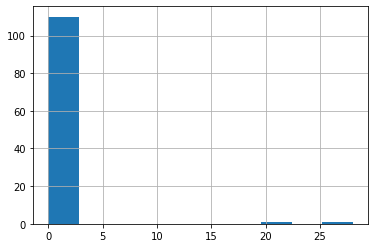

In [14]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count